In [1]:
%matplotlib inline
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.pyplot import figure

In [2]:
def getSortArray(func,size,mu = 0):
    if(func == st.poisson):
        array = func.rvs(size=size,mu=mu)
    else:
        array = func.rvs(size = size)
    array.sort()
    return array

In [3]:
def mean(array):
    n = len(array)
    sm = 0
    for i in range(len(array)):
        sm += array[i]
    sm /= n
    return sm

def disp(array):
    mn = mean(array)
    sm = 0
    n = len(array)
    for i in range(len(array)):
        sm += (array[i] - mn)**2
    sm /= n
    return sm

In [4]:
def EstimationGauss(func,n,mu=0,k=1,xlim=[-3,3]):
    array = getSortArray(func,size=n,mu=mu)
    
    # coeff Silv
    SilvH = lambda ar : 1.06 * (disp(ar)**0.5)*(n**(-1/5))  
    hn = SilvH(array)
    hn /= k
    
    
    GaussCore = lambda u : (1/((2 * math.pi) ** 0.5)) * math.exp(-u**2/2)
    
    def getFunc(ar,h,sz):
        def CoreFunc(x):
            return (1/(sz*h) * sum([GaussCore((x - i)/h) for i in ar]))
        return CoreFunc
    
    CoreX = getFunc(array,hn,n)
    
    x = np.linspace(xlim[0],xlim[1],10000)
    y = list(map(CoreX,x))

    return (x,y)

In [5]:

def PlotEstimator(func,size,title,mu=0,xlim=[-3,3]):
    k = [0.5,1,2]
    fig, ax = plt.subplots(1,len(k))
    fig.set_figwidth(20)
    fig.set_figheight(5)
    fig.suptitle(title + " ,n = " + str(size))
    for i in range(len(k)):
        ay = ax[i]
        x,y = EstimationGauss(func,size,mu,xlim=xlim)
        if func == st.poisson:
            x_true = np.linspace(xlim[0],xlim[1],10000)
            y_true = func.pmf(mu,x_true)
        else:
            y_true = func.pdf(x)
            x_true = x
        ay.set_title("h = hn*" + str(k[i]))
        ay.plot(x,y,color="black",label="Оценка")
        ay.plot(x_true,y_true,color="red",label="Истинное значение")
        ay.legend()
        ay.grid()
        ay.set_xlabel("x")
        ay.set_ylabel("f(x)")
    fig.set_dpi(300)
    plt.show()


In [6]:


def GetPlot(func,size,mu=0):
    P,ar = toProbability(getSortArray(func,size,mu=mu))
    sumP = 0
    for i in range(len(P)):
        sumP += P[i]
        P[i] = sumP
    sumAr = 0
    return ar,P

def Distribution(func,xmin,xmax,mu=0):
    x = np.linspace(xmin,xmax,10000)

    if func == st.poisson:
        y = func.cdf(x,mu=mu)
    else:
        y = func.cdf(x)
    return x,y

def PlotDistForTest(ax,x,y):
    for i in range(len(x) - 1 ):
        ax.plot(x[i:2 + i],[y[i],y[i]],color="blue")
        ax.plot([x[1 + i],x[1 + i]],y[i:2 + i], color="blue")
        
def toProbability(array):
    ln = [0 for i in range(len(set(array)))]
    index = 0
    i = 0
    while True:
        ln[index] += 1
        if(i == len(array) - 1):
            break
        i += 1
        if(array[i] != array[i - 1]):
            index += 1
    sm = sum(ln)
    for i in range(len(ln)):
        ln[i] = ln[i]/sm
    array = sorted(list(set(array)))
    return ln,array

def GetPlot(func,size,mu=0):
    P,ar = toProbability(getSortArray(func,size,mu=mu))
    sumP = 0
    for i in range(len(P)):
        sumP += P[i]
        P[i] = sumP
    sumAr = 0
    return ar,P

def Distribution(func,xmin,xmax,mu=0):
    x = np.linspace(xmin,xmax,10000)
    if func == st.poisson:
        y = func.cdf(x,mu=mu)
    else:
        y = func.cdf(x)
    return x,y
        
def PlotDistribution(func,size,title,mu=0,xlim=[-4,4]):
    fig, ax = plt.subplots(1,len(size))
    fig.set_figwidth(12)
    fig.set_figheight(3)
    for i in range(len(size)):
        x,y = GetPlot(func,size[i],mu=mu)
        x_true,y_true = Distribution(func,xlim[0],xlim[1],mu=mu)
        ay = ax[i]
        ay.set_title(title + ", n = " + str(size[i]))
        PlotDistForTest(ay,x,y)
        ay.plot(x_true,y_true,color="red")
        ay.grid()
        ay.set_xlabel("x")
        ay.set_ylabel("f(x)")
        ay.set_xlim(xlim)
    fig.set_dpi(300)
    plt.show()

### Функция Распределения

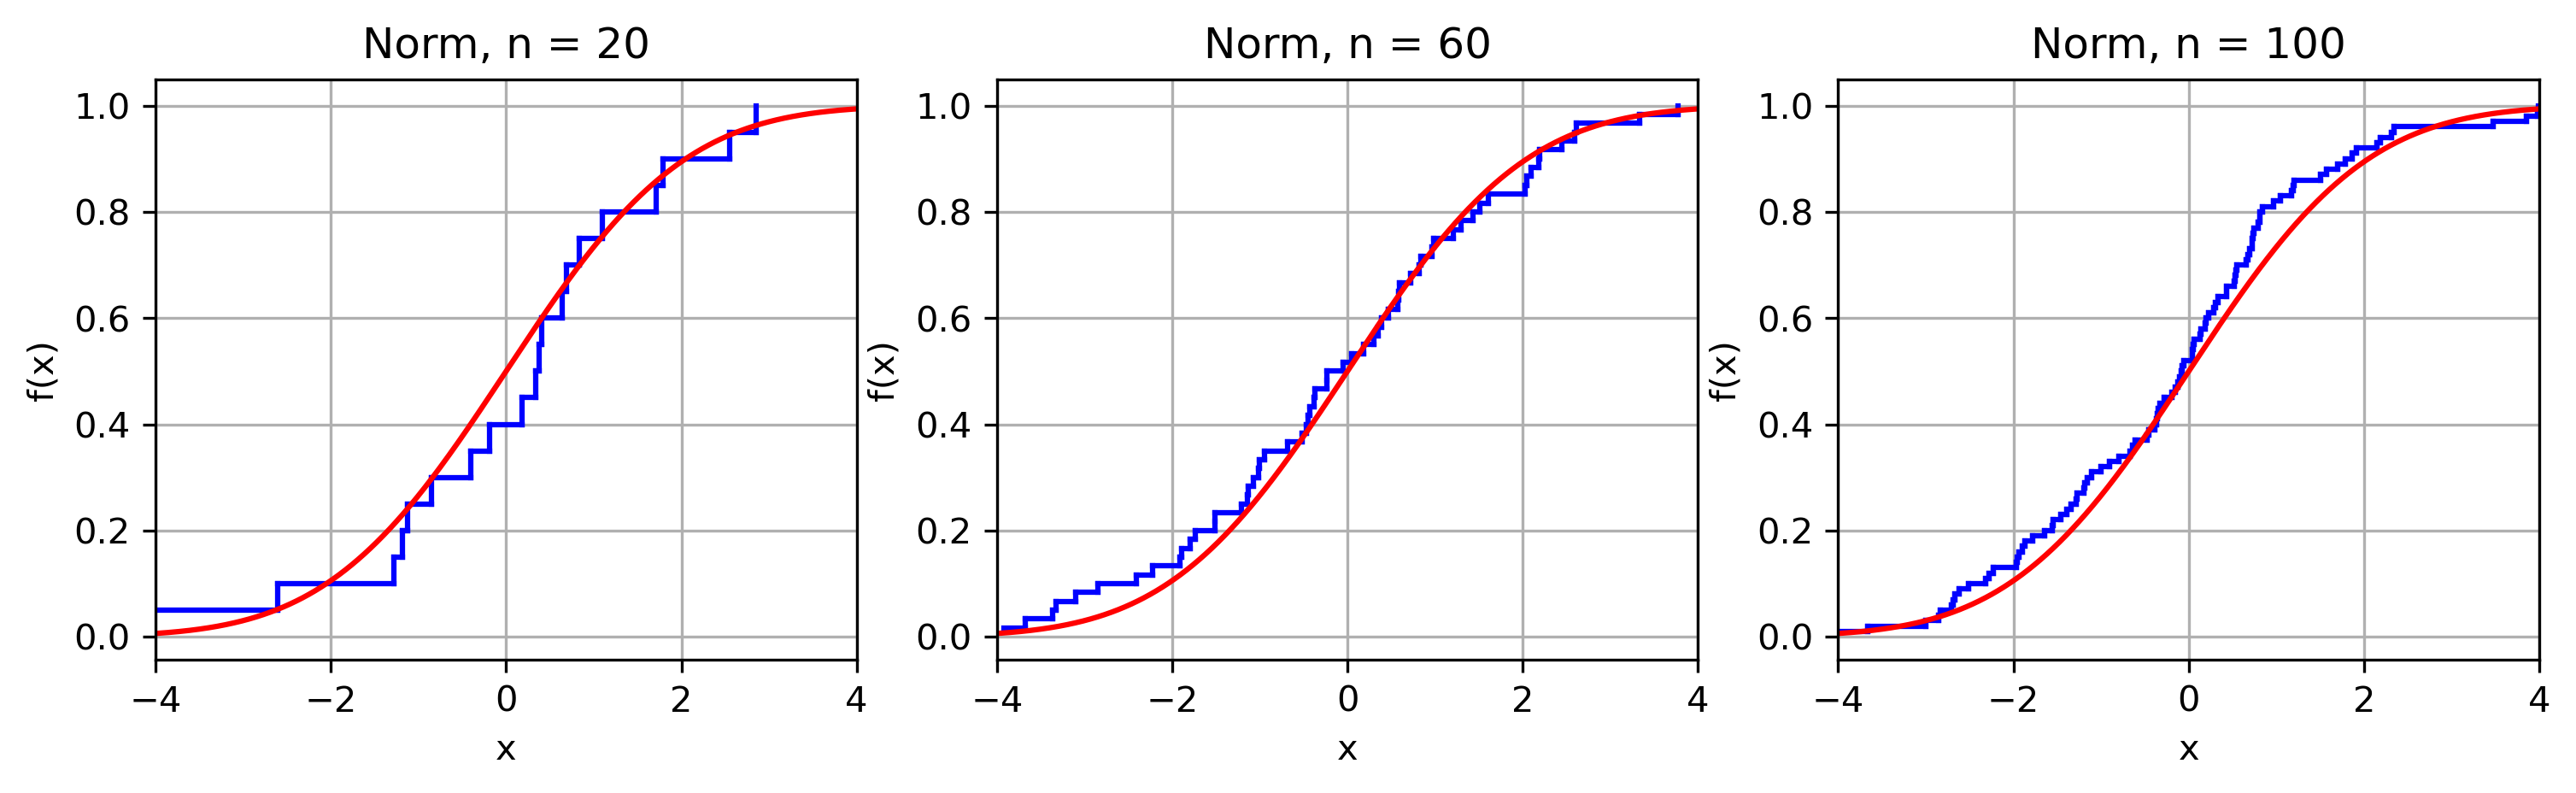

In [7]:
# нормальное распределение
PlotDistribution(st.norm(scale=1.6),size = [20,60,100],title='Norm')

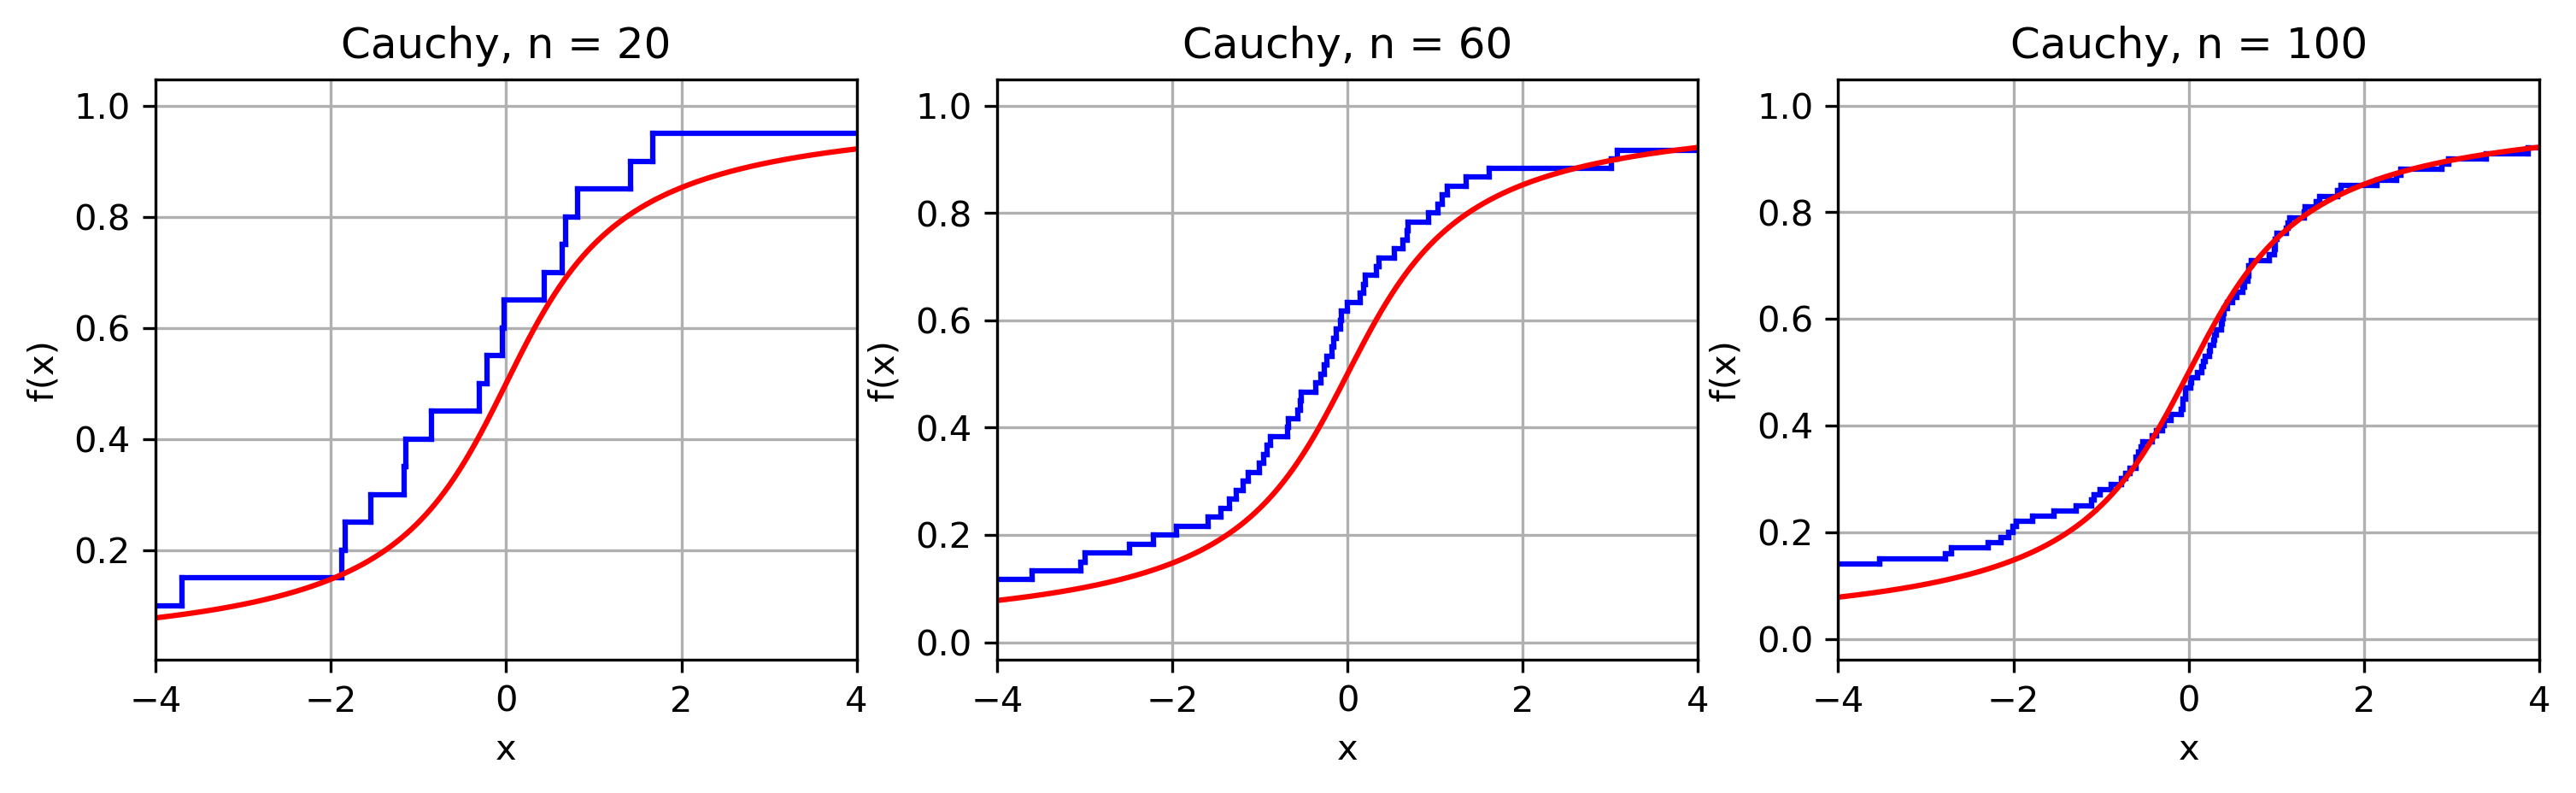

In [8]:
# Распределение Коши
PlotDistribution(st.cauchy,size = [20,60,100],title='Cauchy')

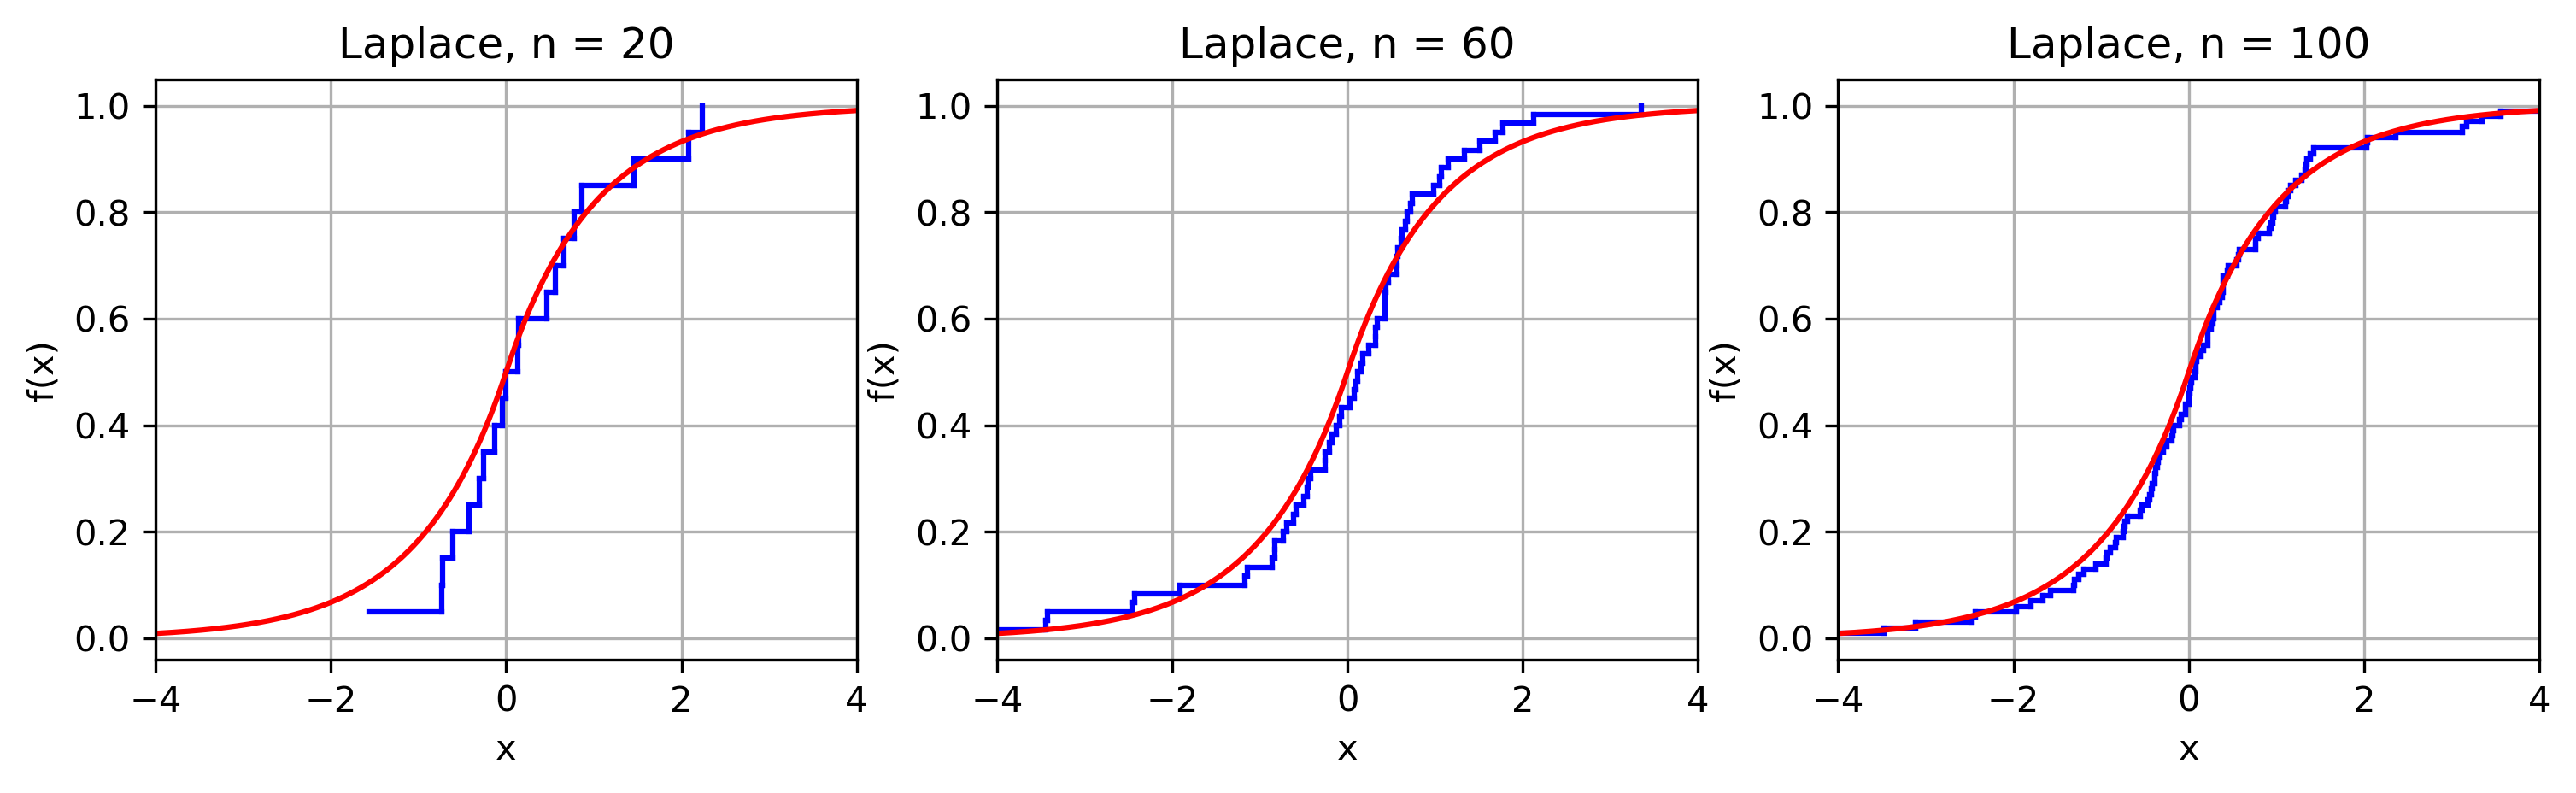

In [9]:
# Распределение Лапласа
PlotDistribution(st.laplace(scale=1),size = [20,60,100],title='Laplace')

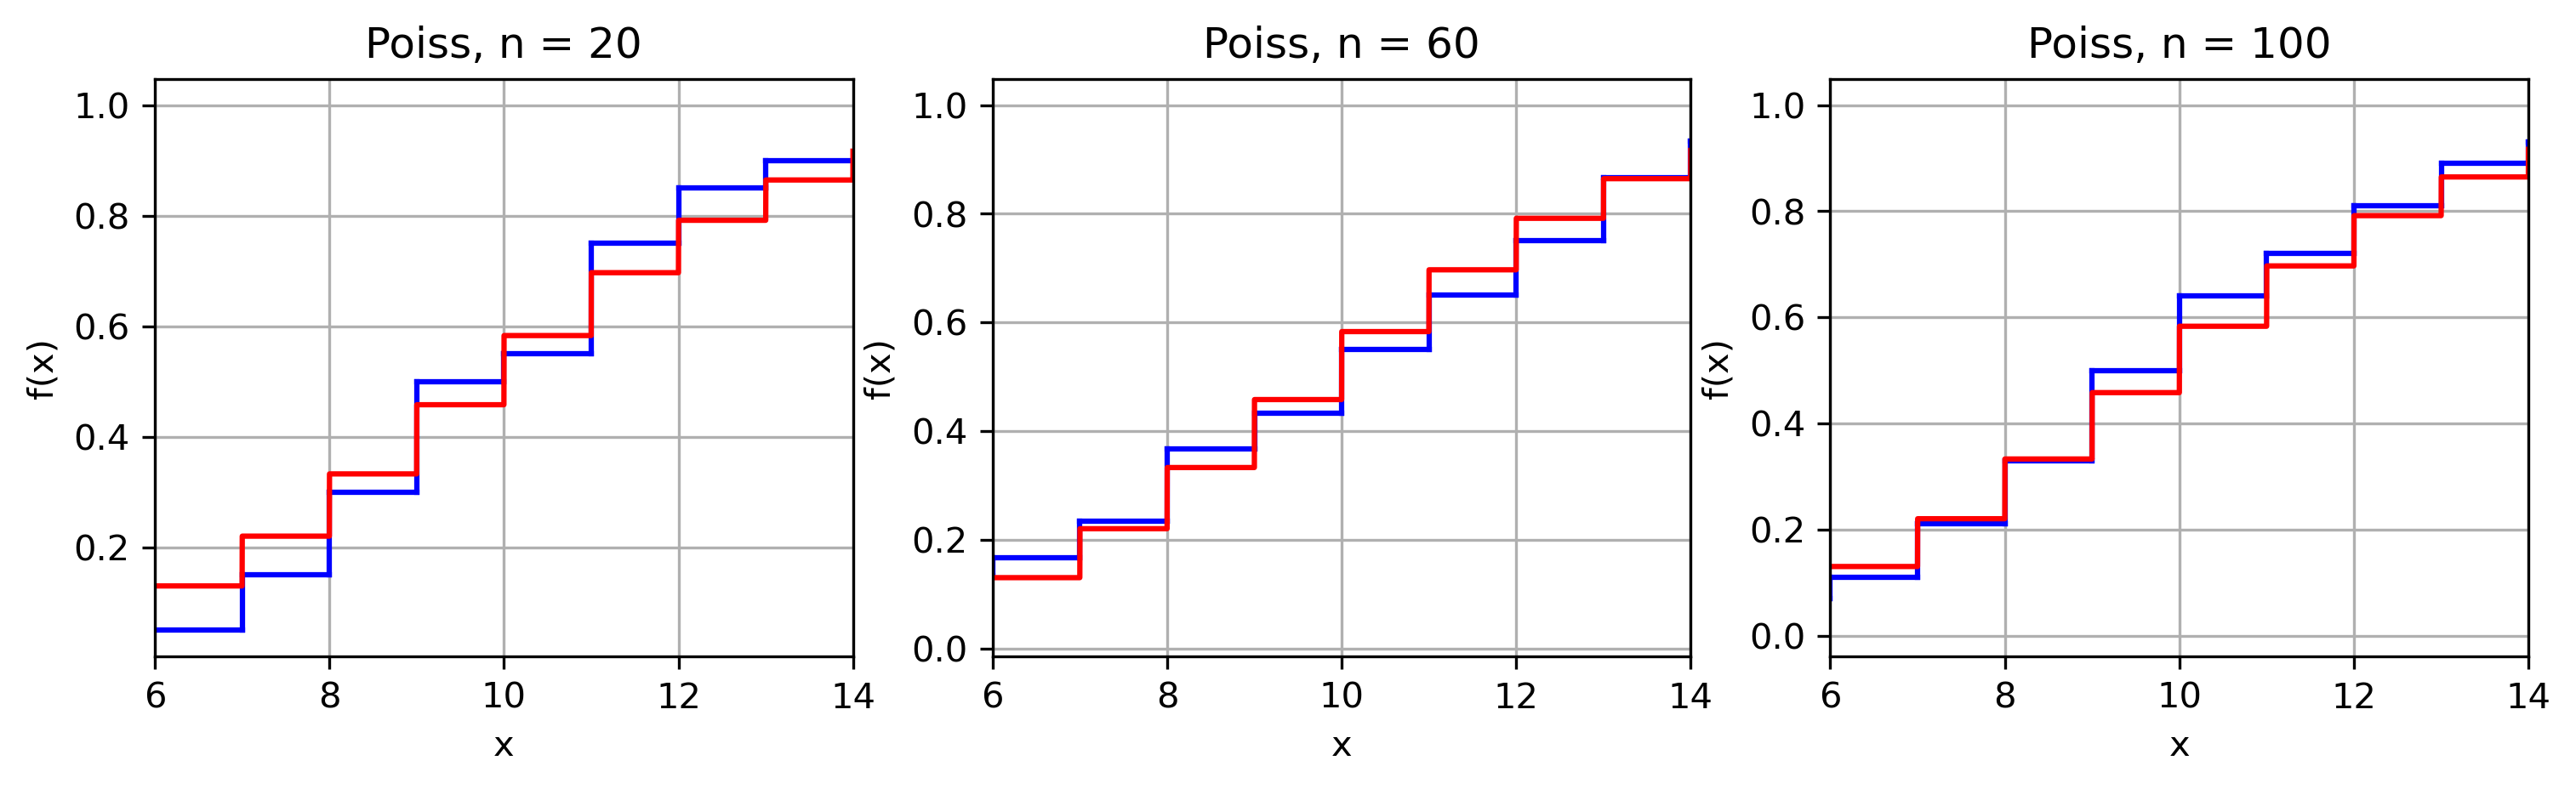

In [10]:
# Распределение Пуассона
PlotDistribution(st.poisson,mu=10,size = [20,60,100],title='Poiss',xlim=[6,14])

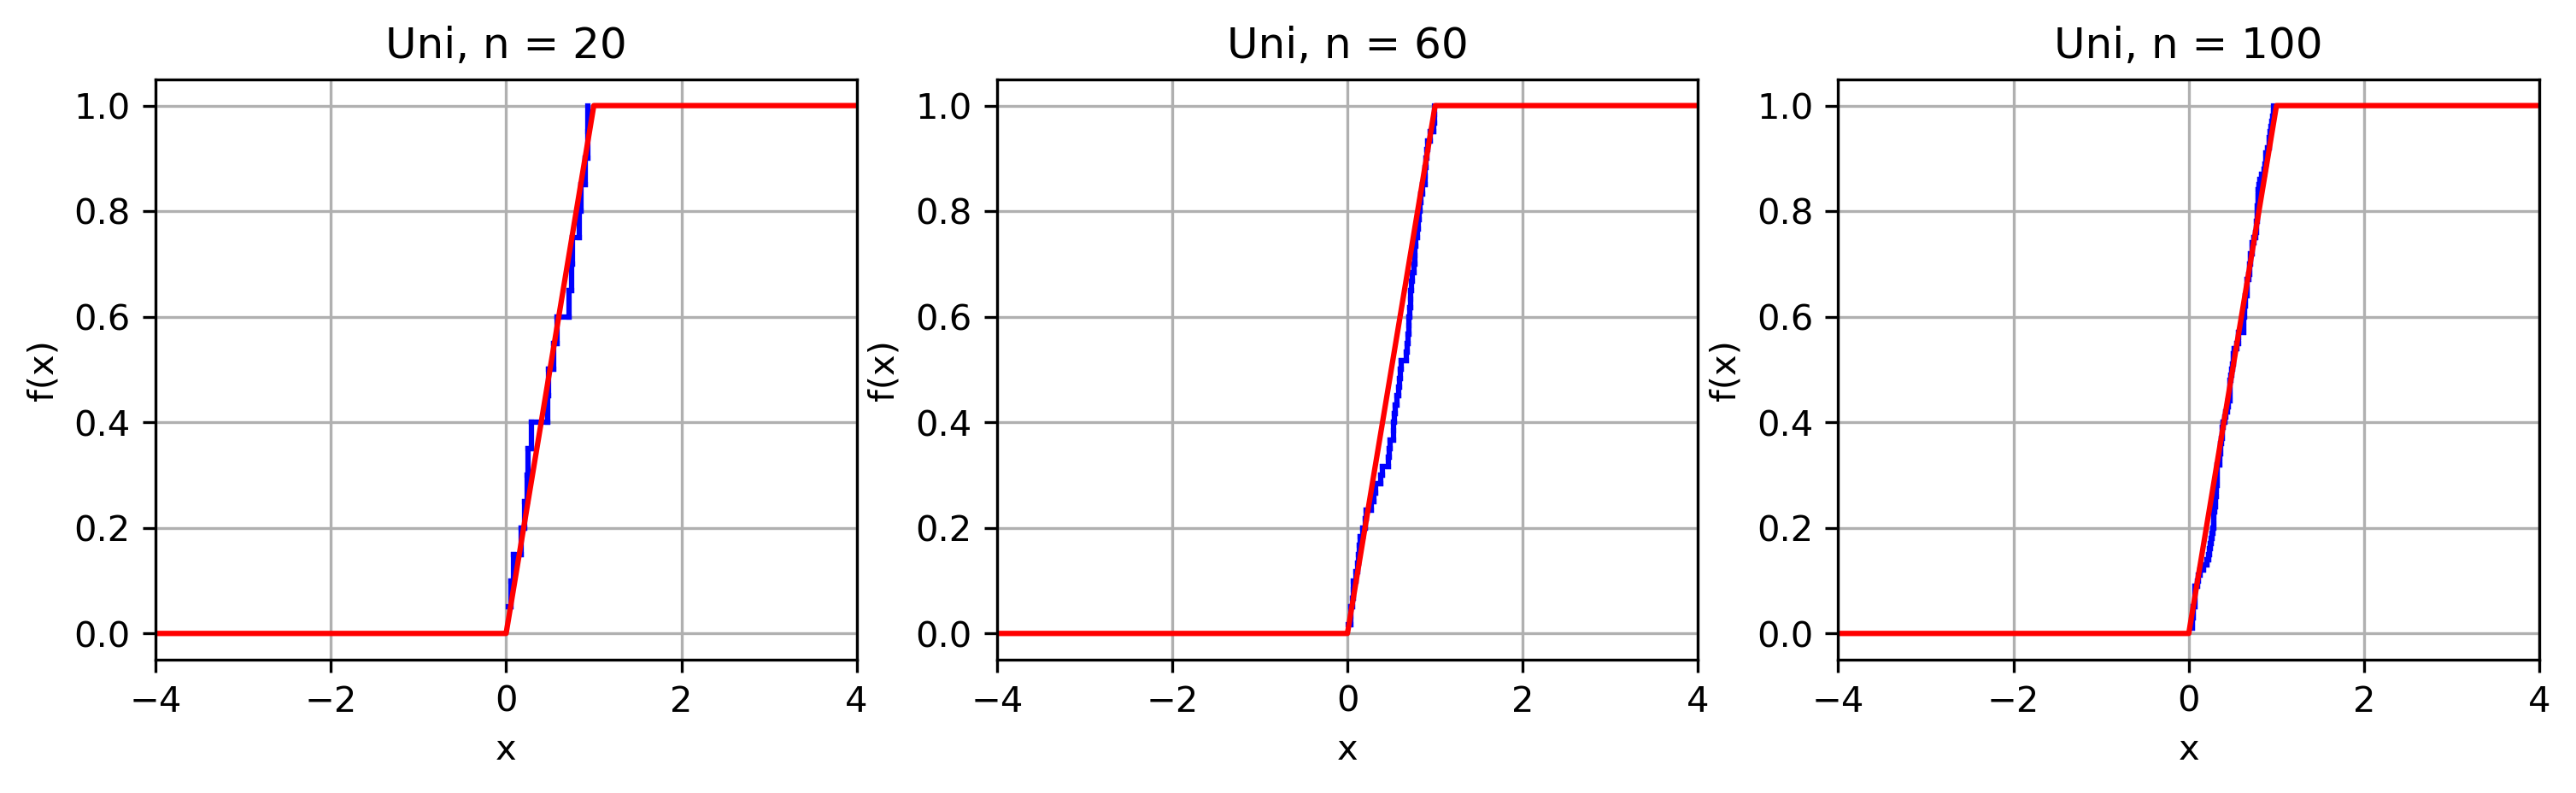

In [11]:
#Равномерное распределение
PlotDistribution(st.uniform,size=[20,60,100],title='Uni')

### Ядерные Оценки

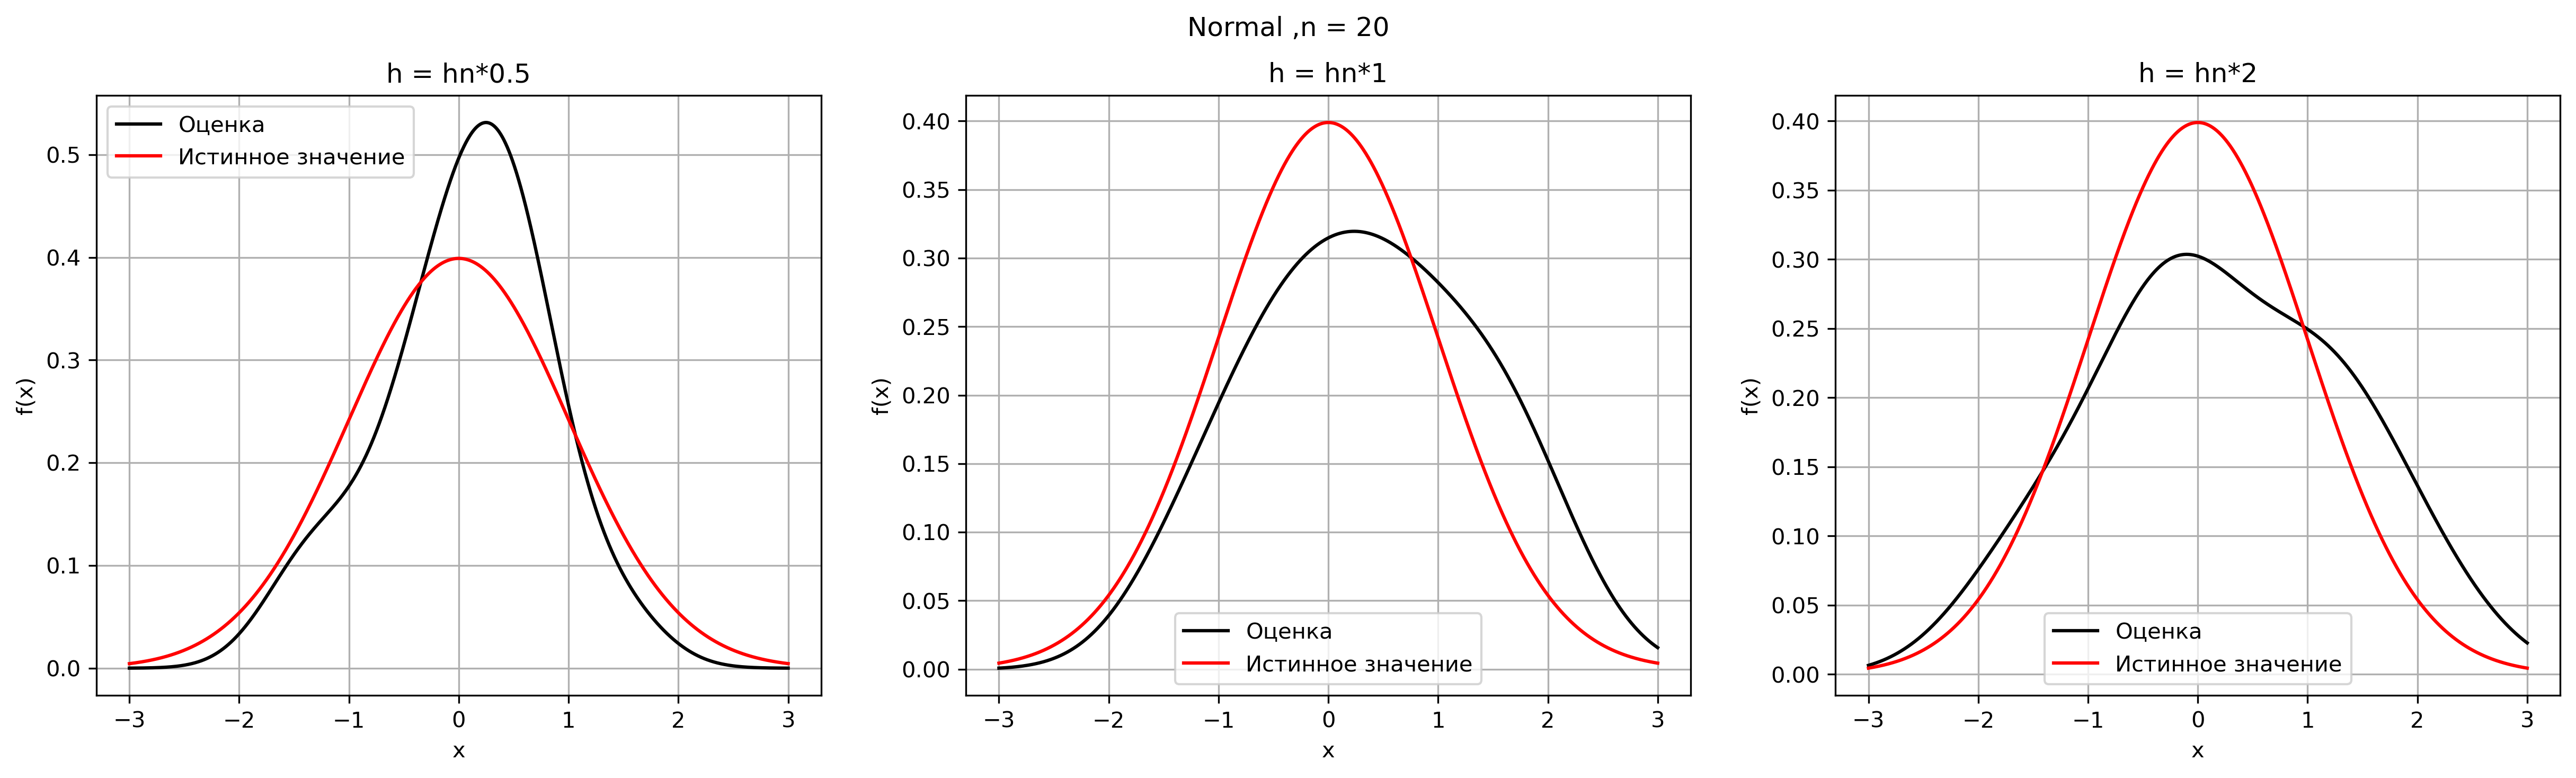

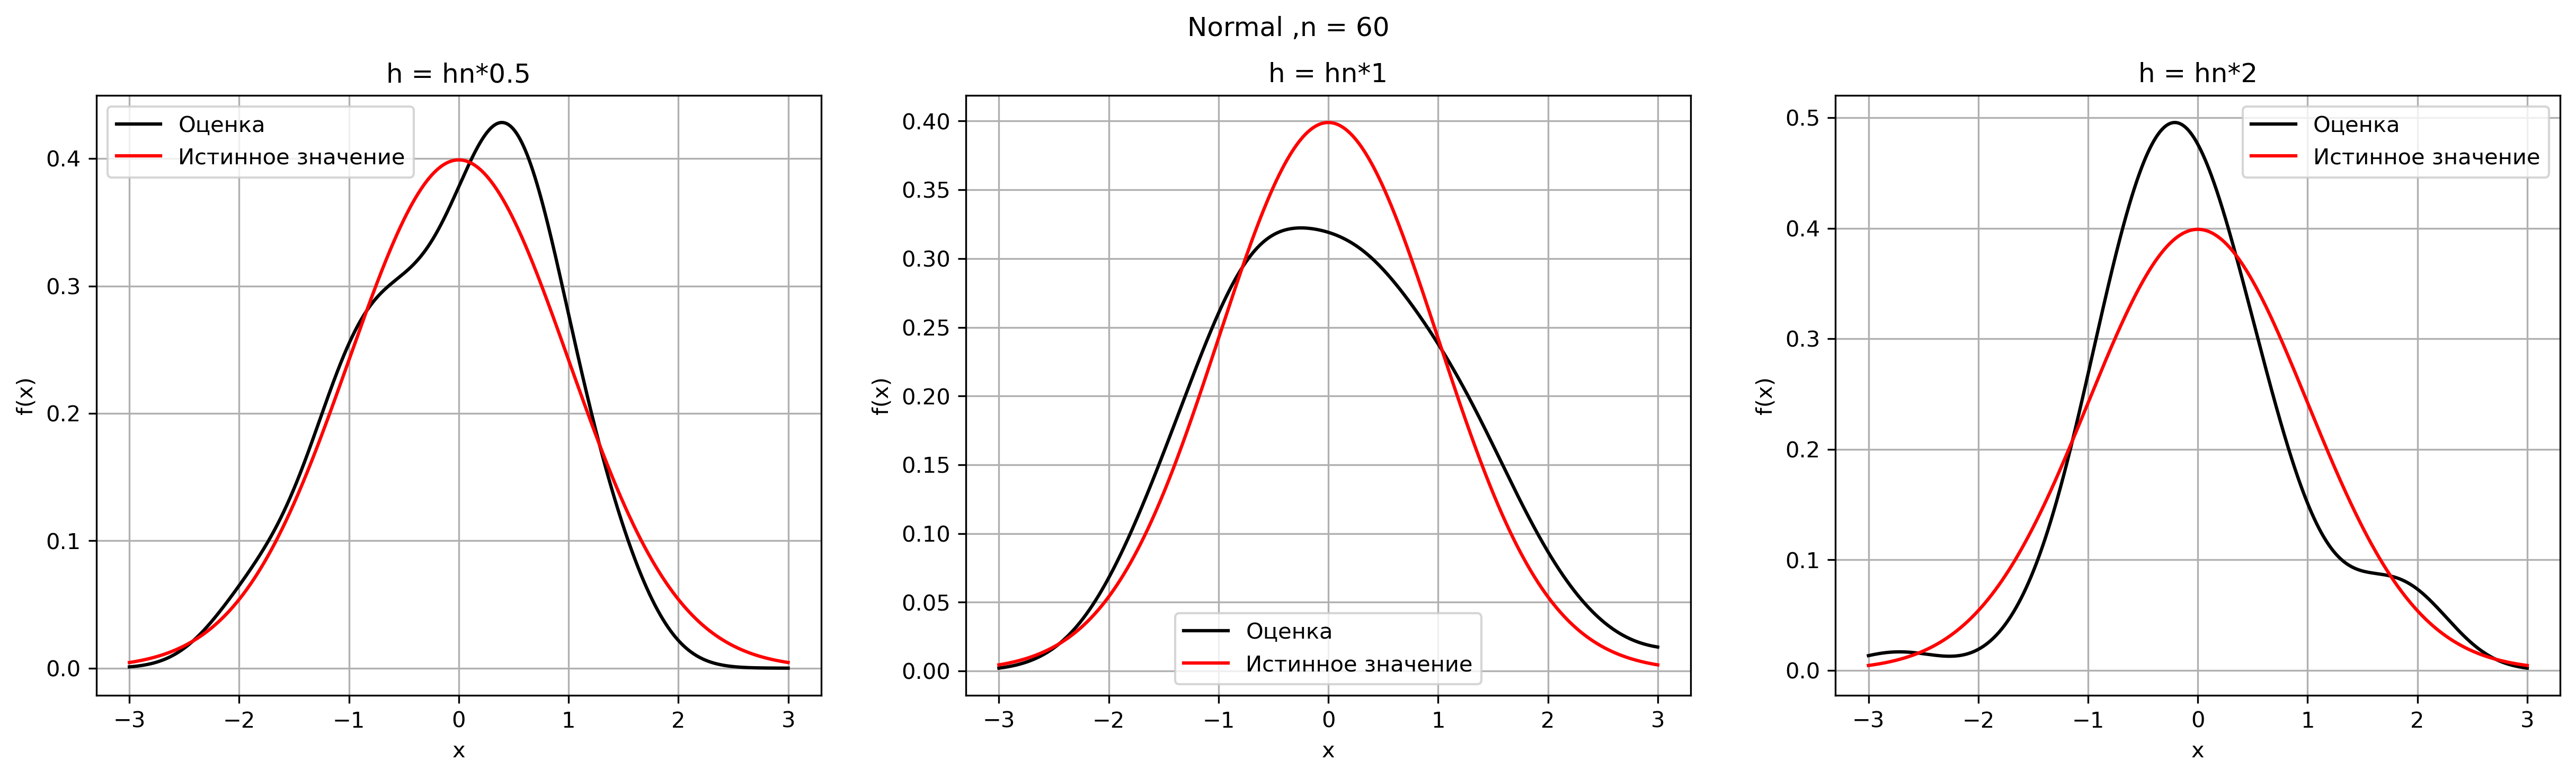

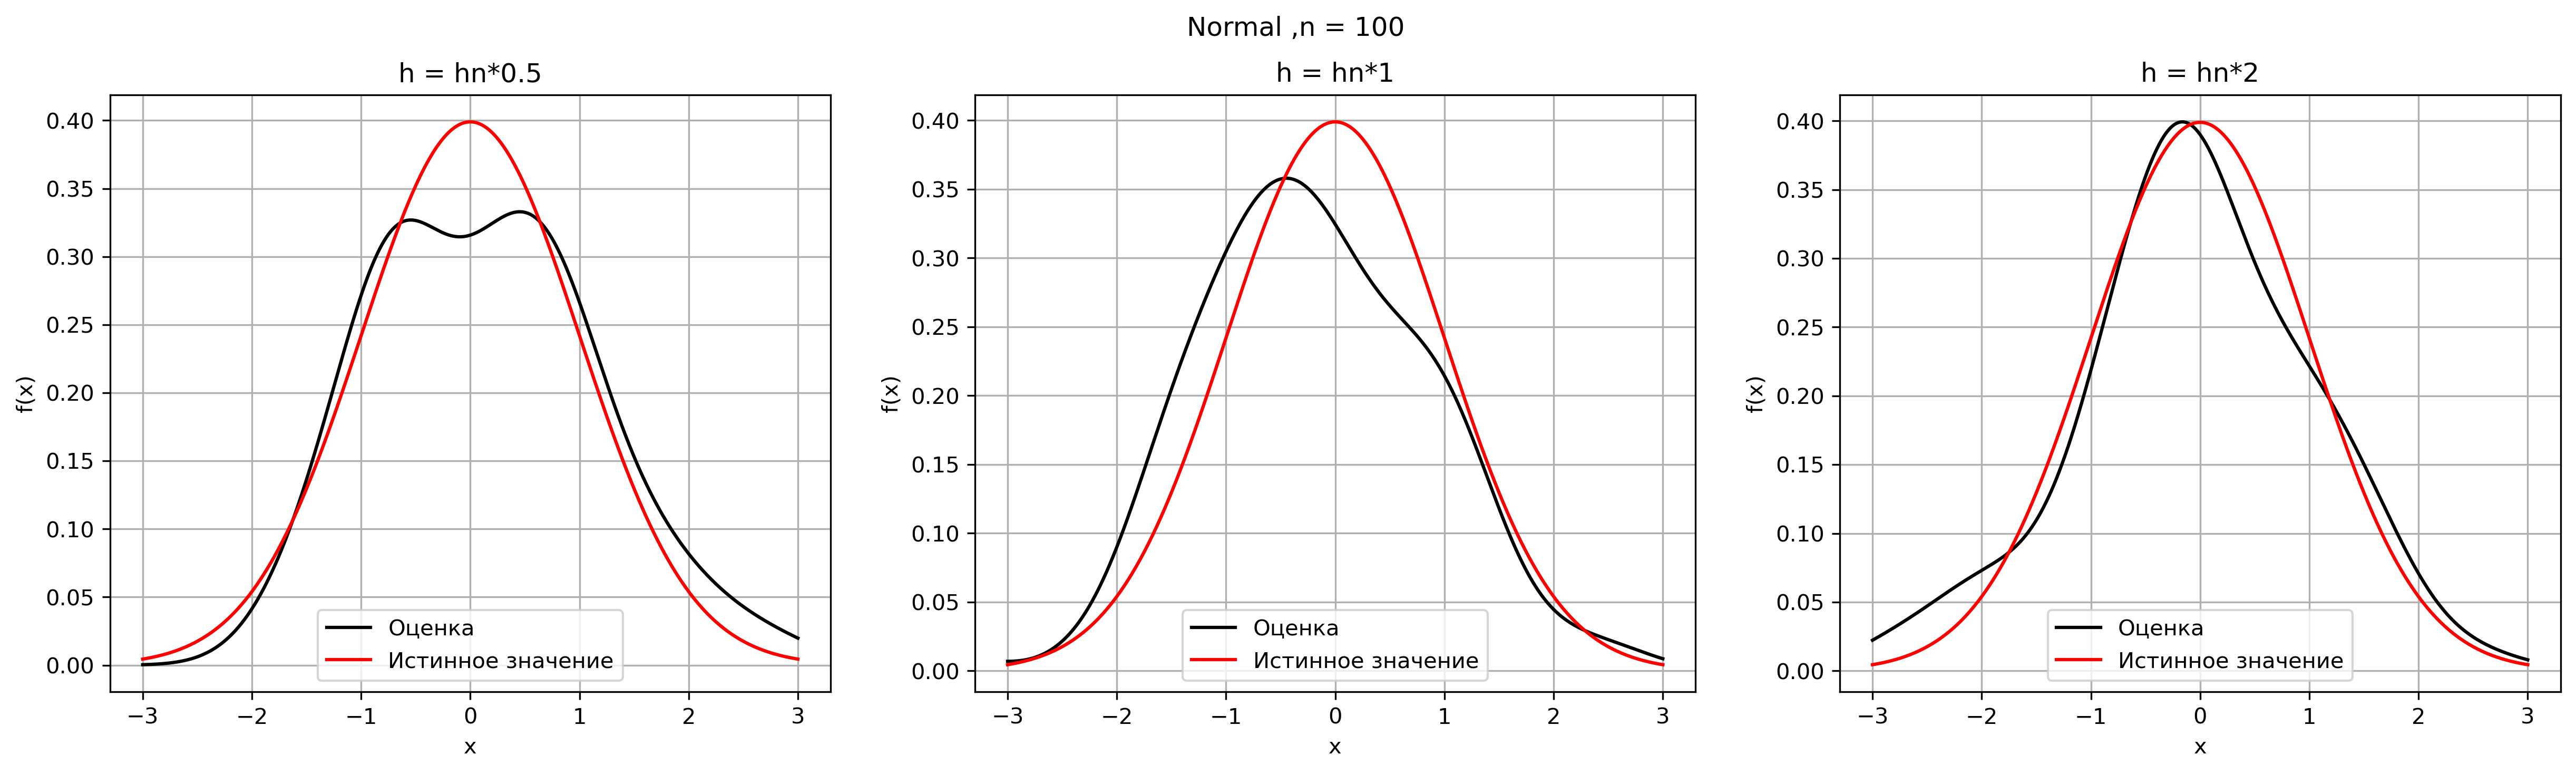

In [12]:
# Нормальное распределение
size = [20,60,100]
for i in size:
    PlotEstimator(st.norm,size=i,title="Normal")


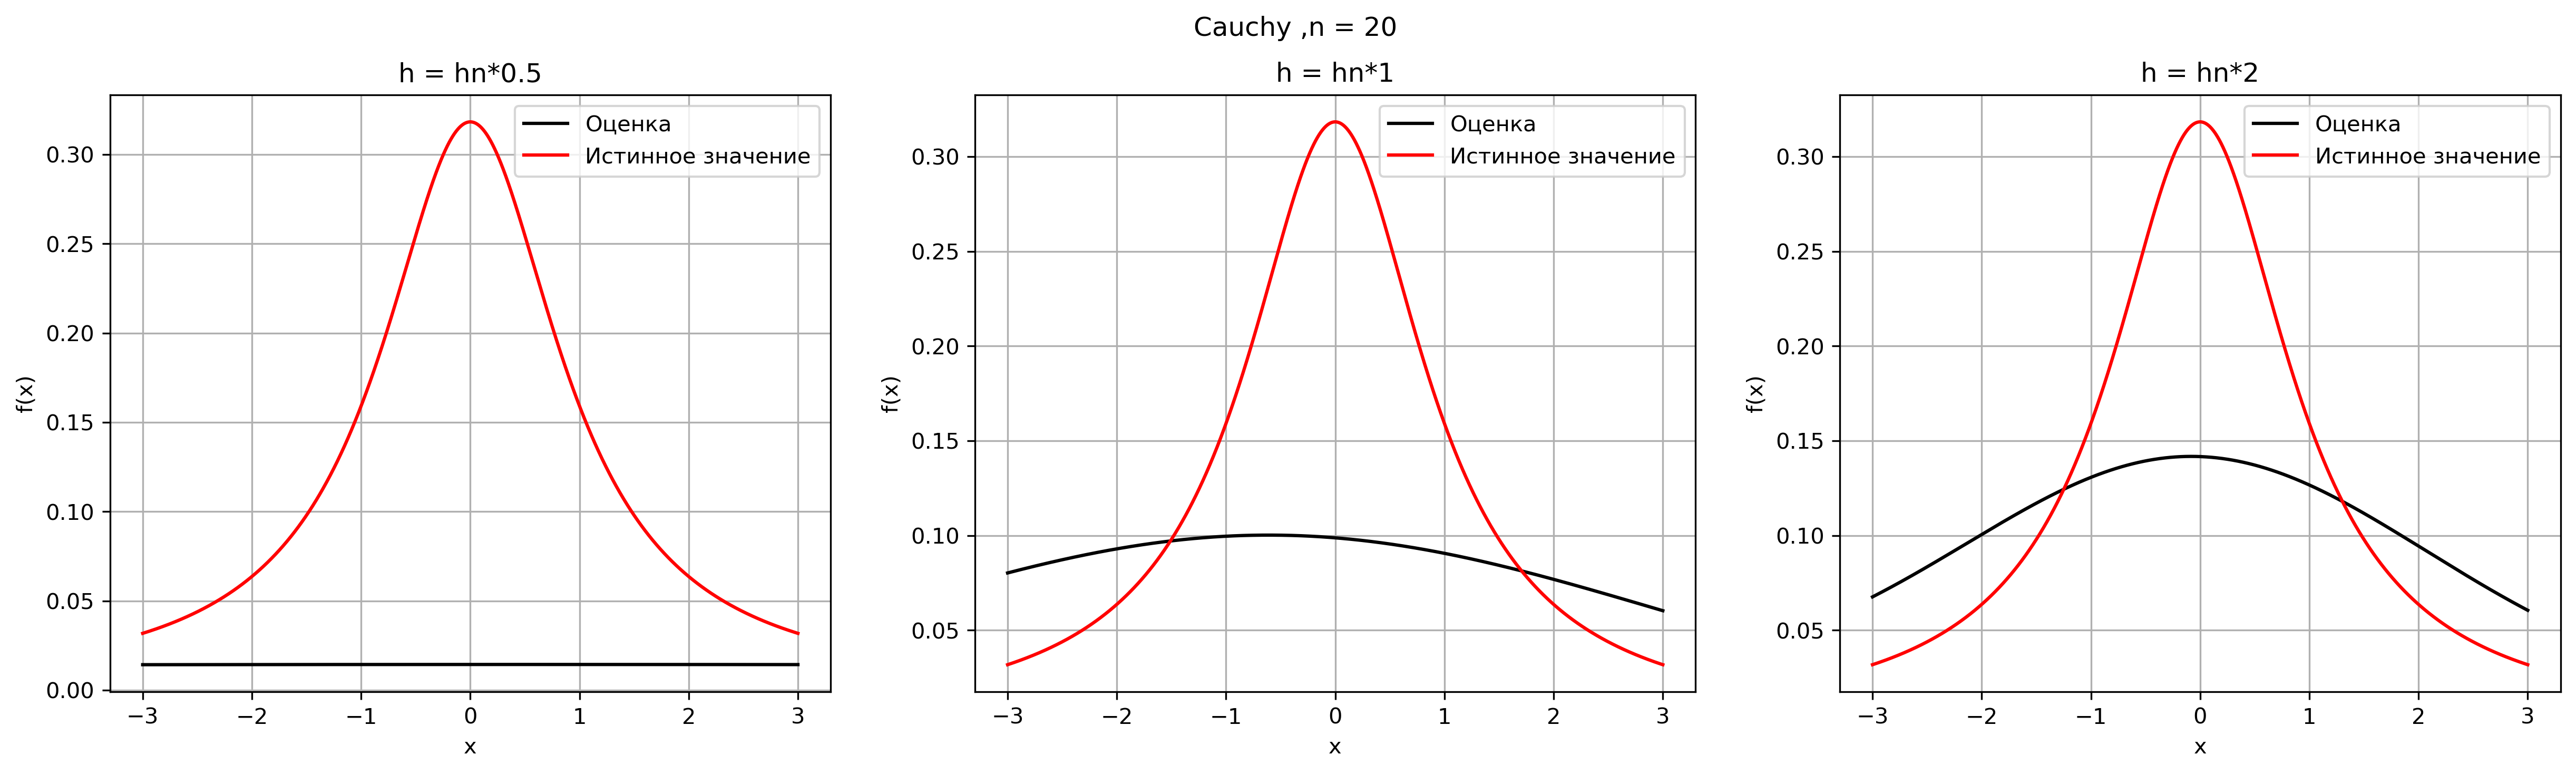

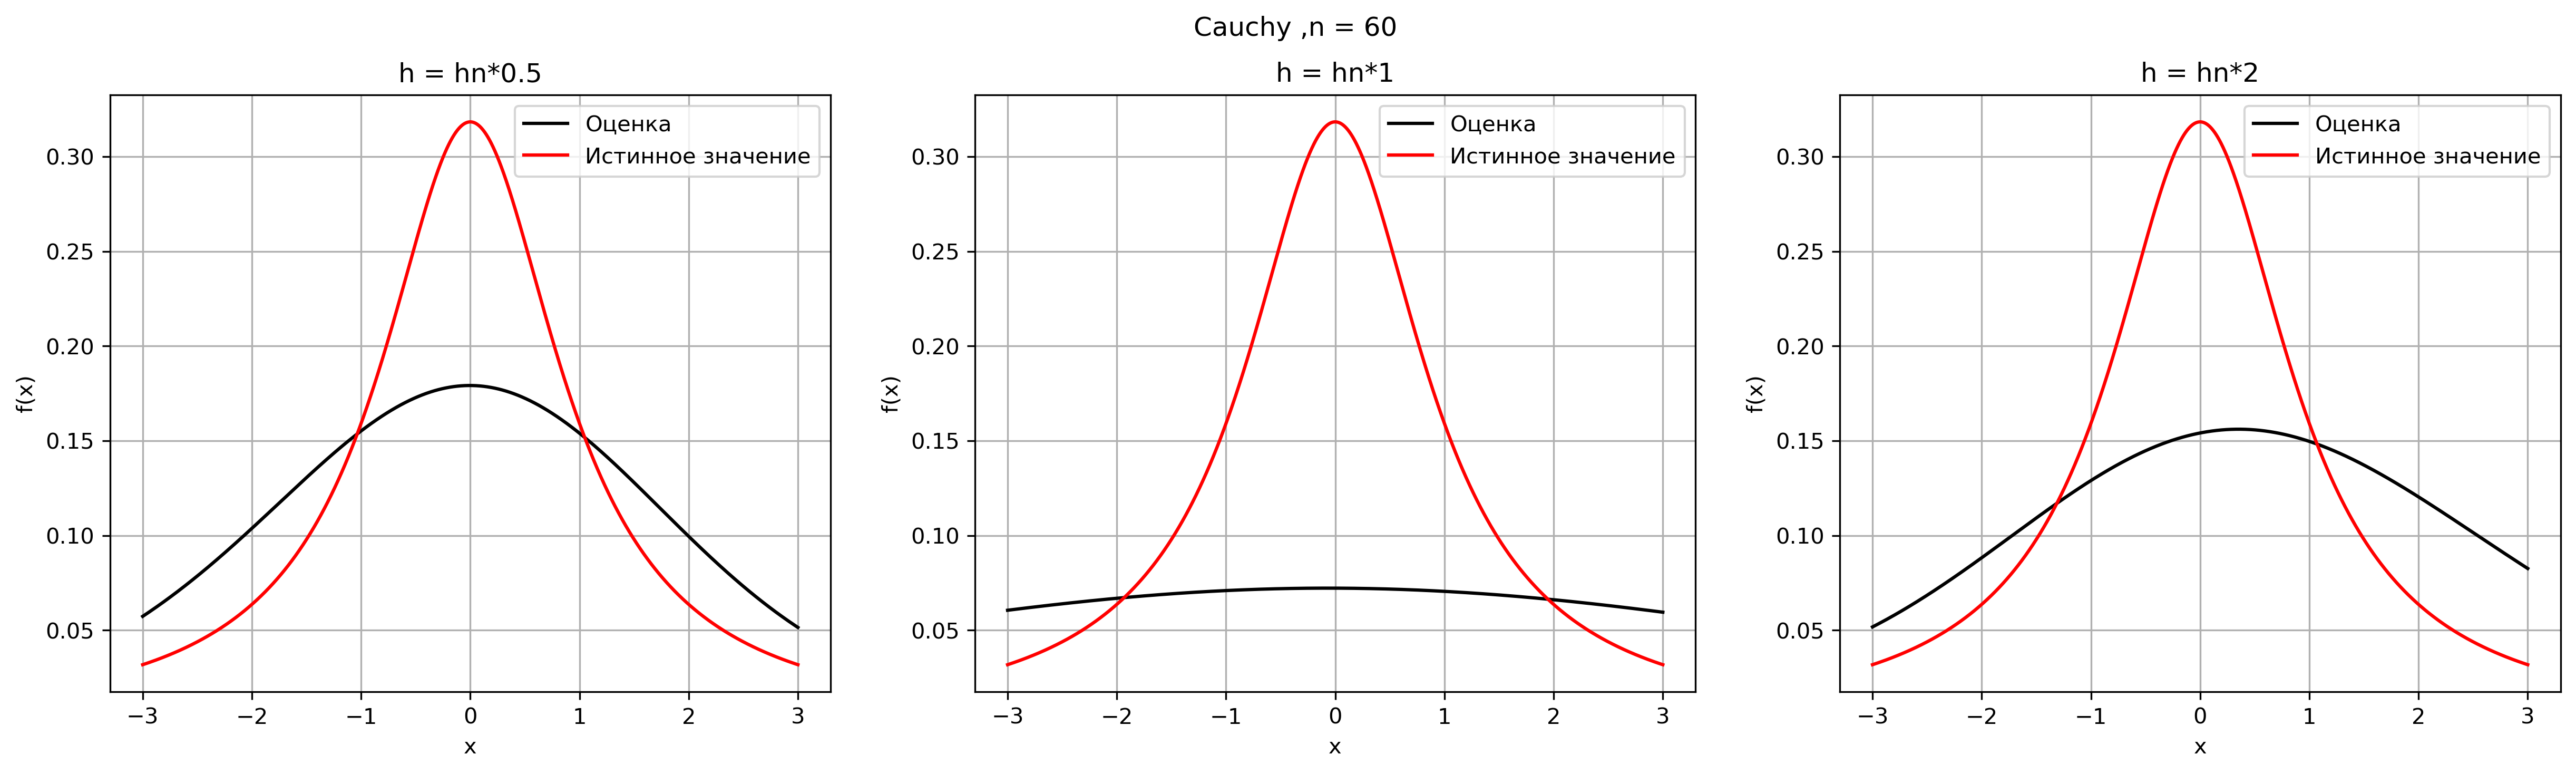

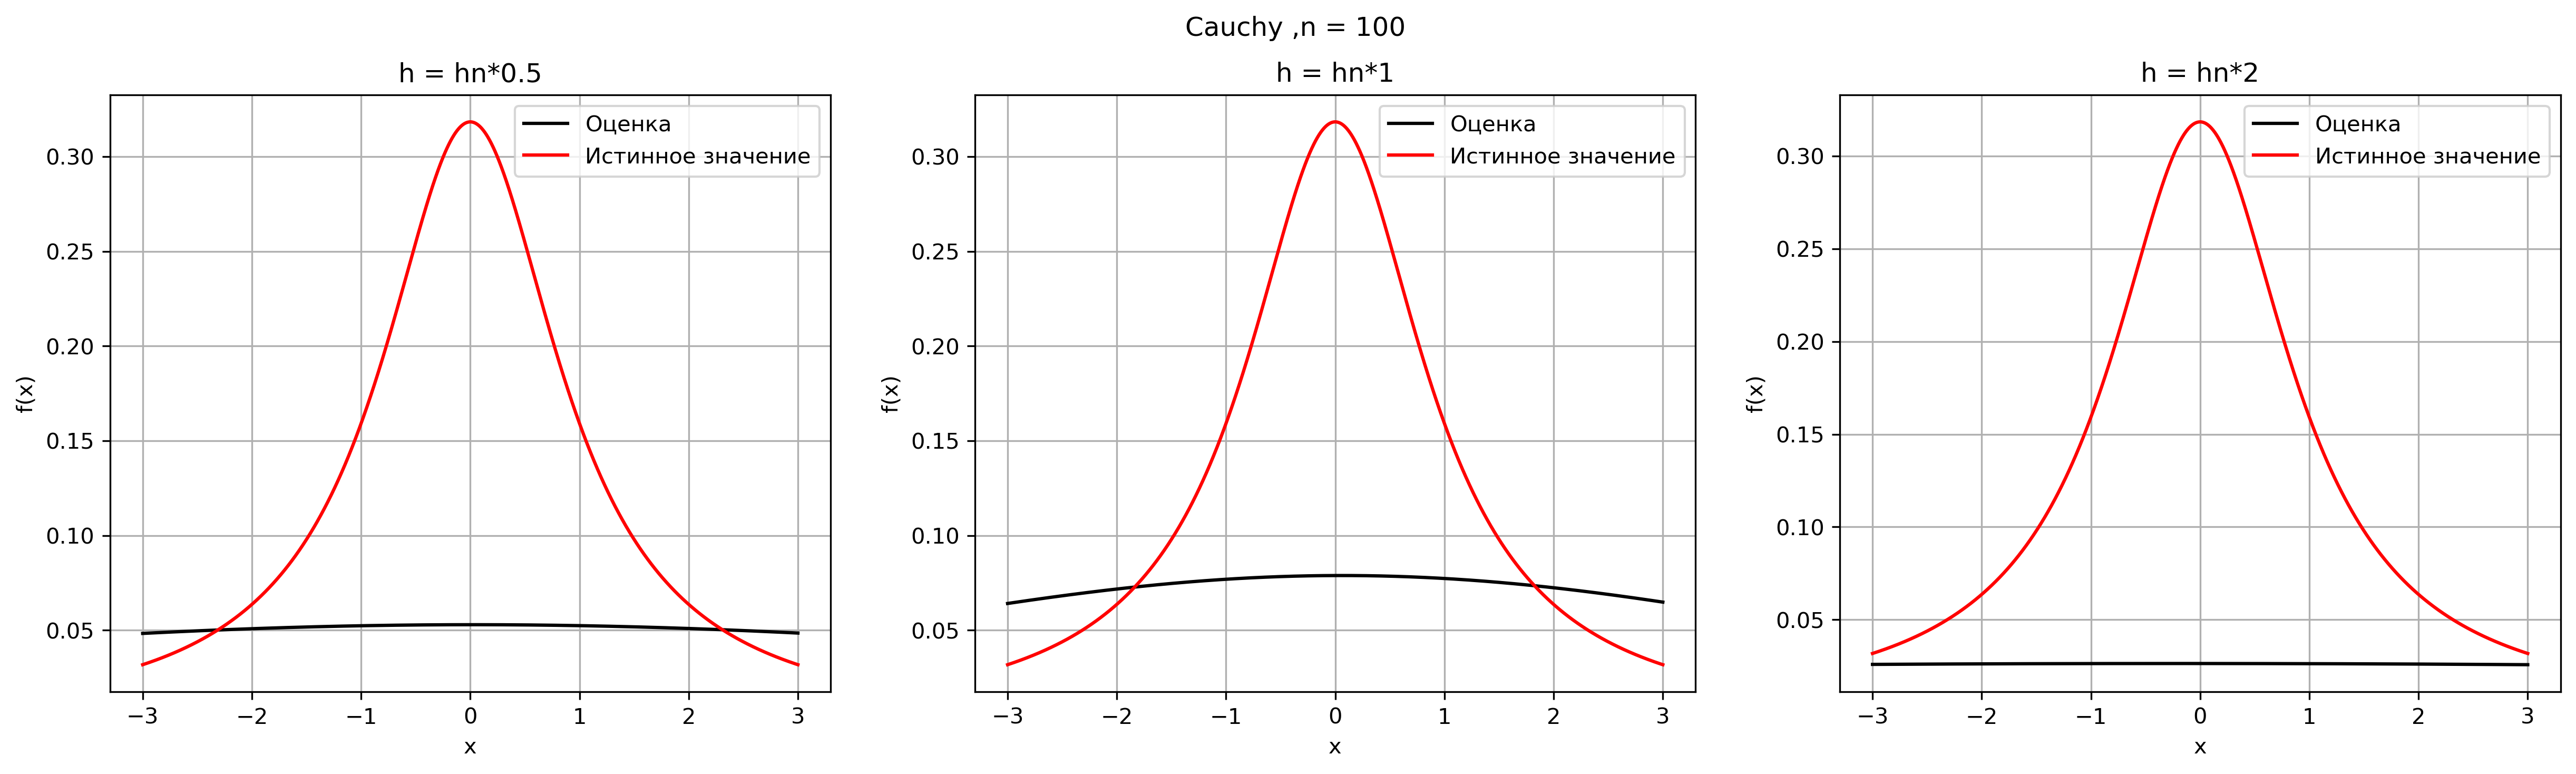

In [13]:
# Распределение Коши
size = [20,60,100]
for i in size:
    PlotEstimator(st.cauchy,size=i,title="Cauchy")

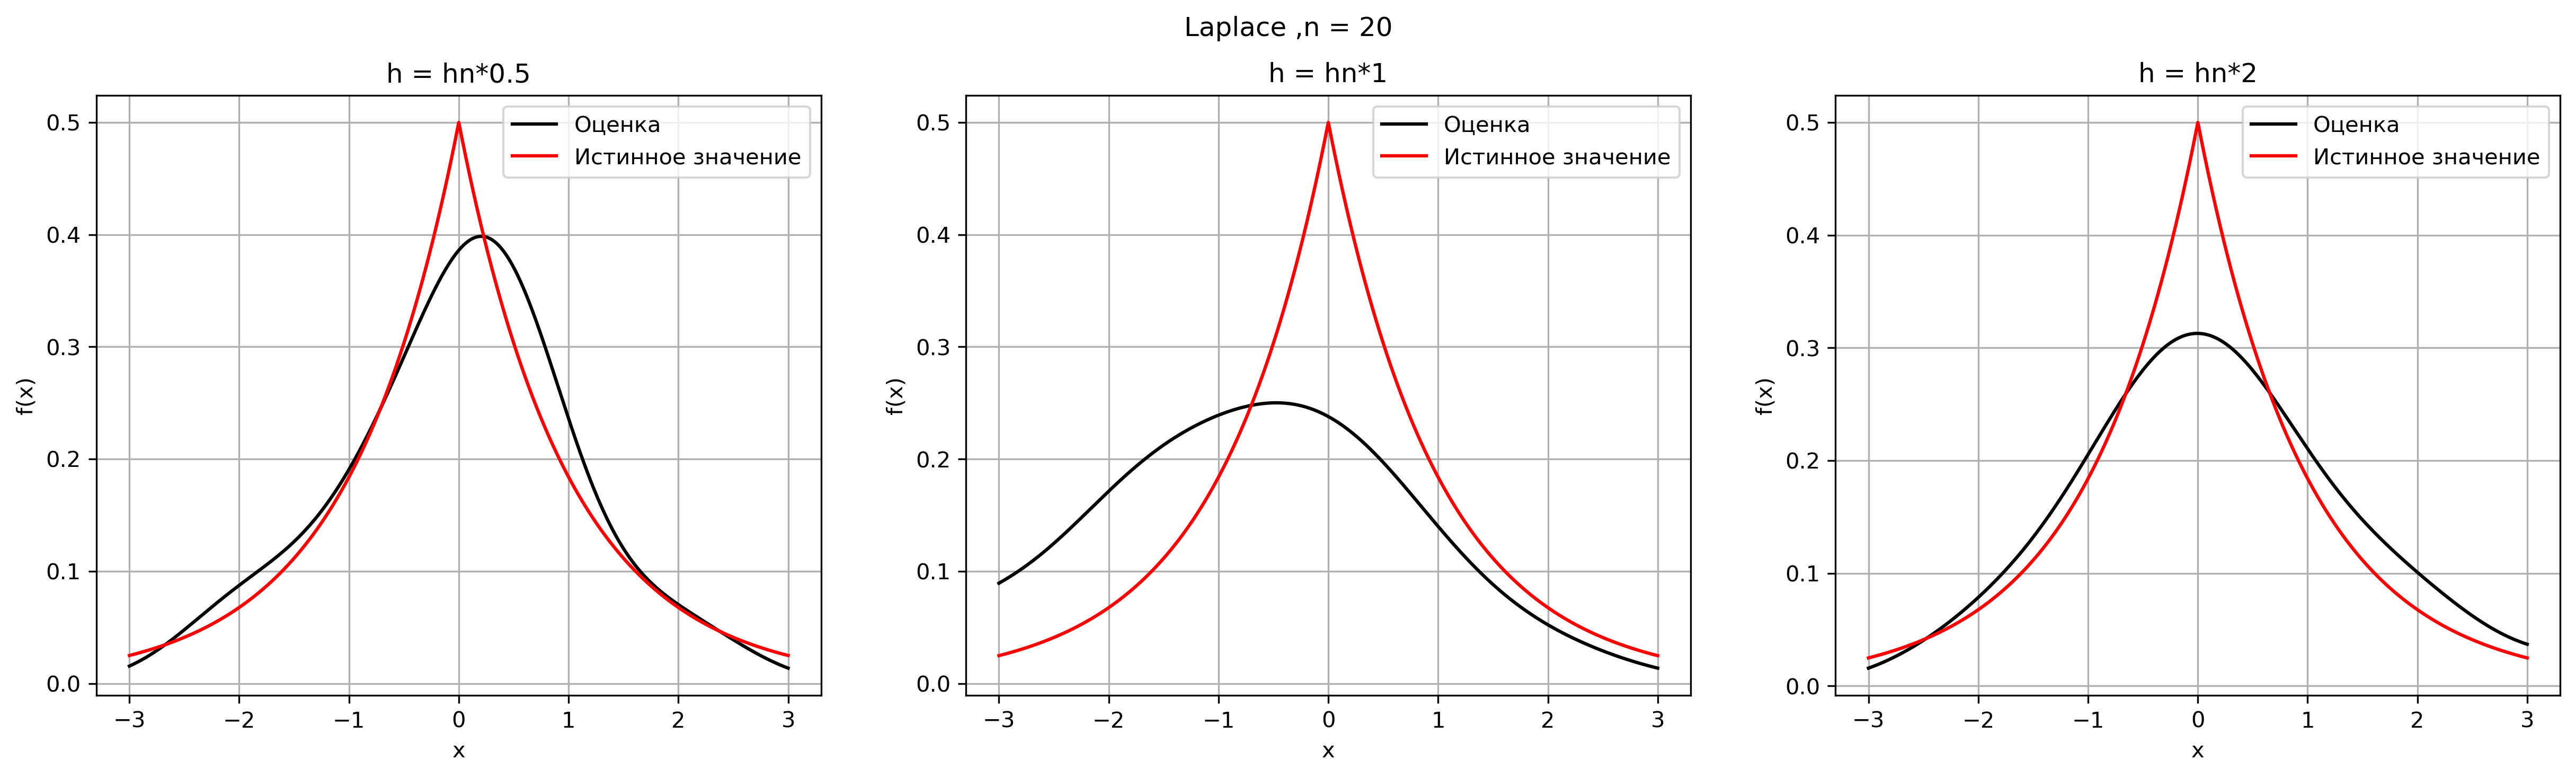

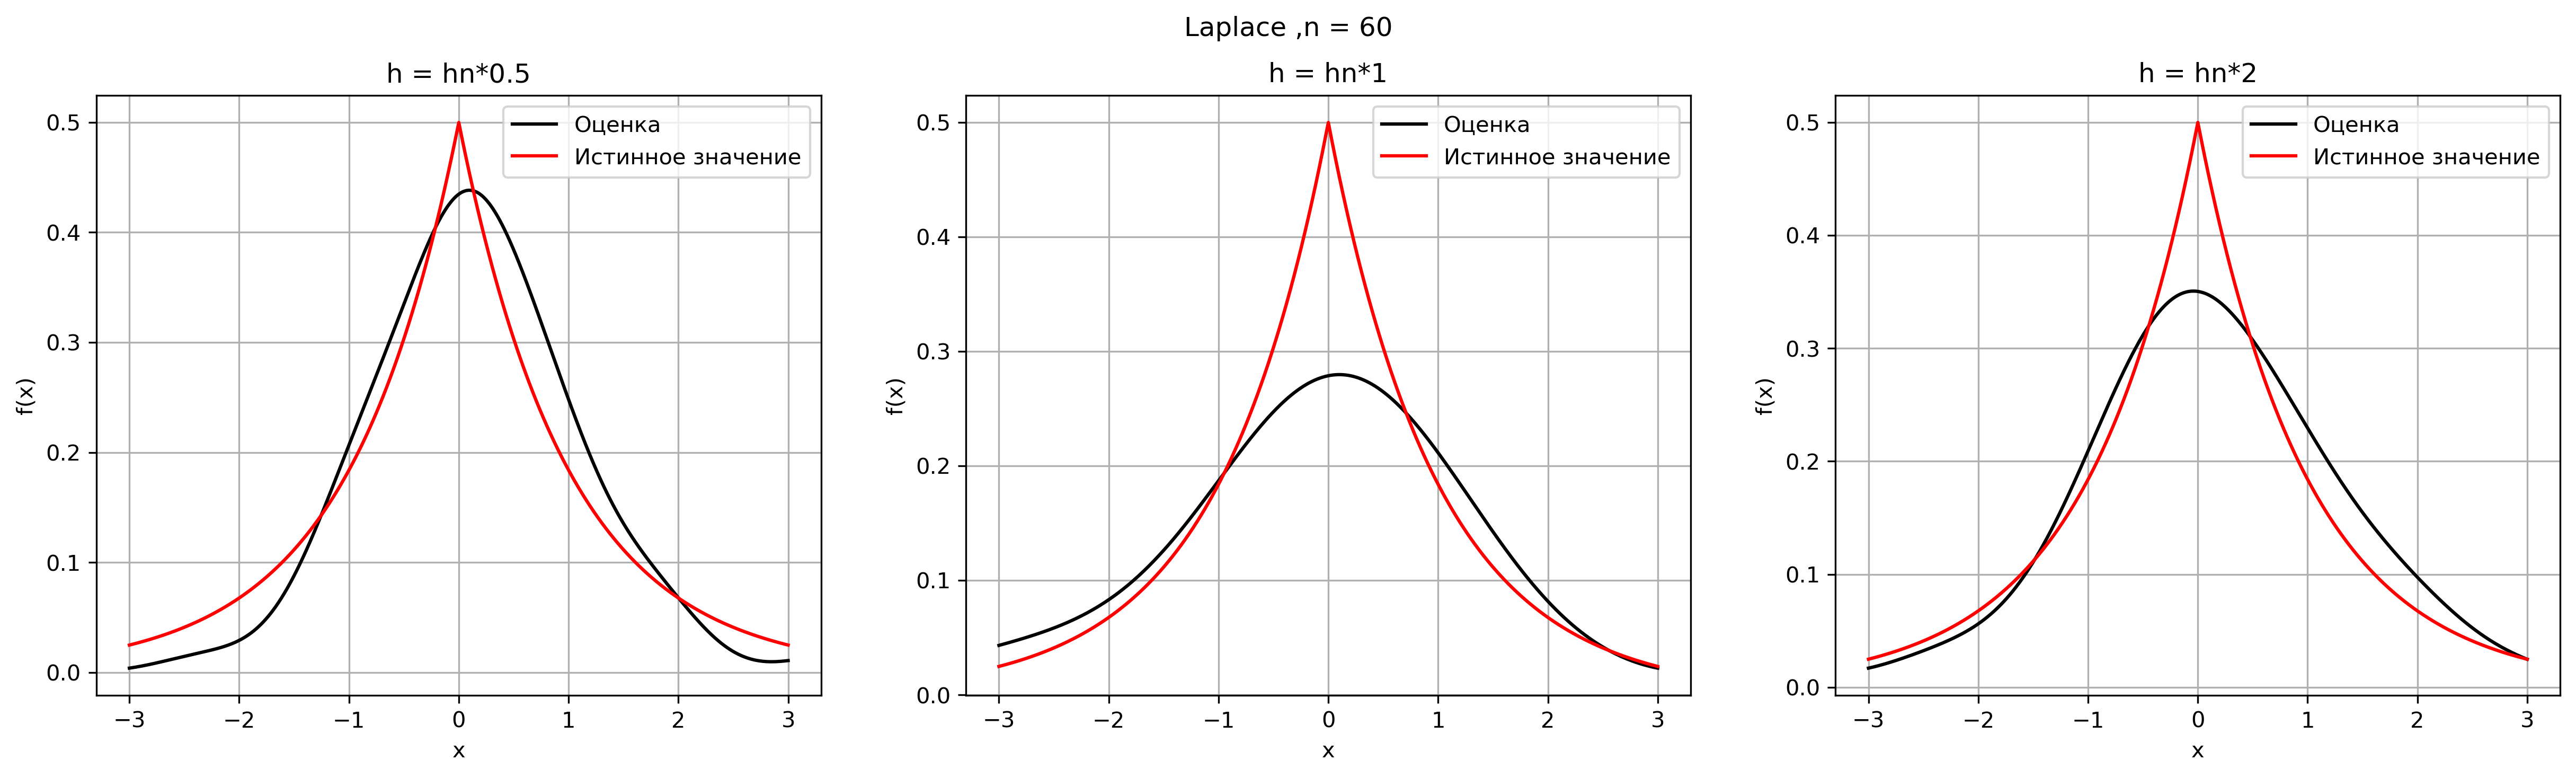

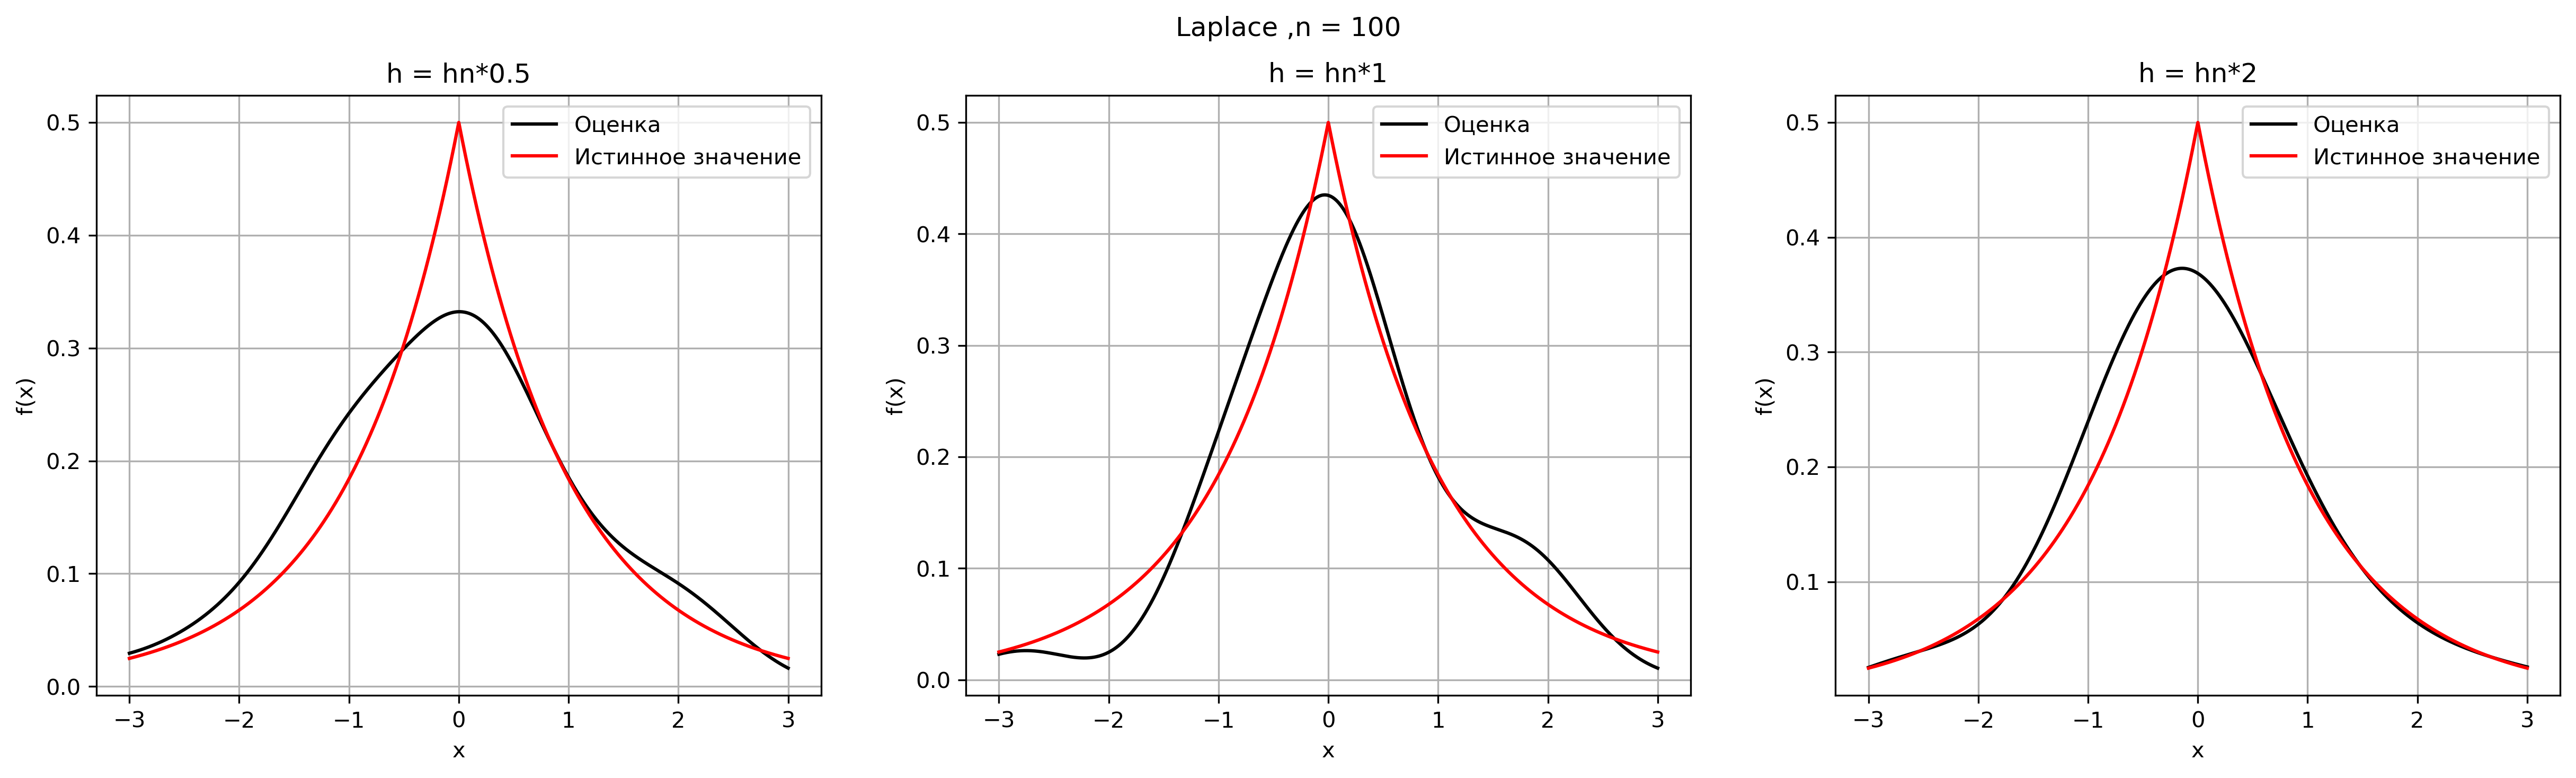

In [14]:
# Распределение Лапласа
size = [20,60,100]
for i in size:
    PlotEstimator(st.laplace,size=i,title="Laplace")

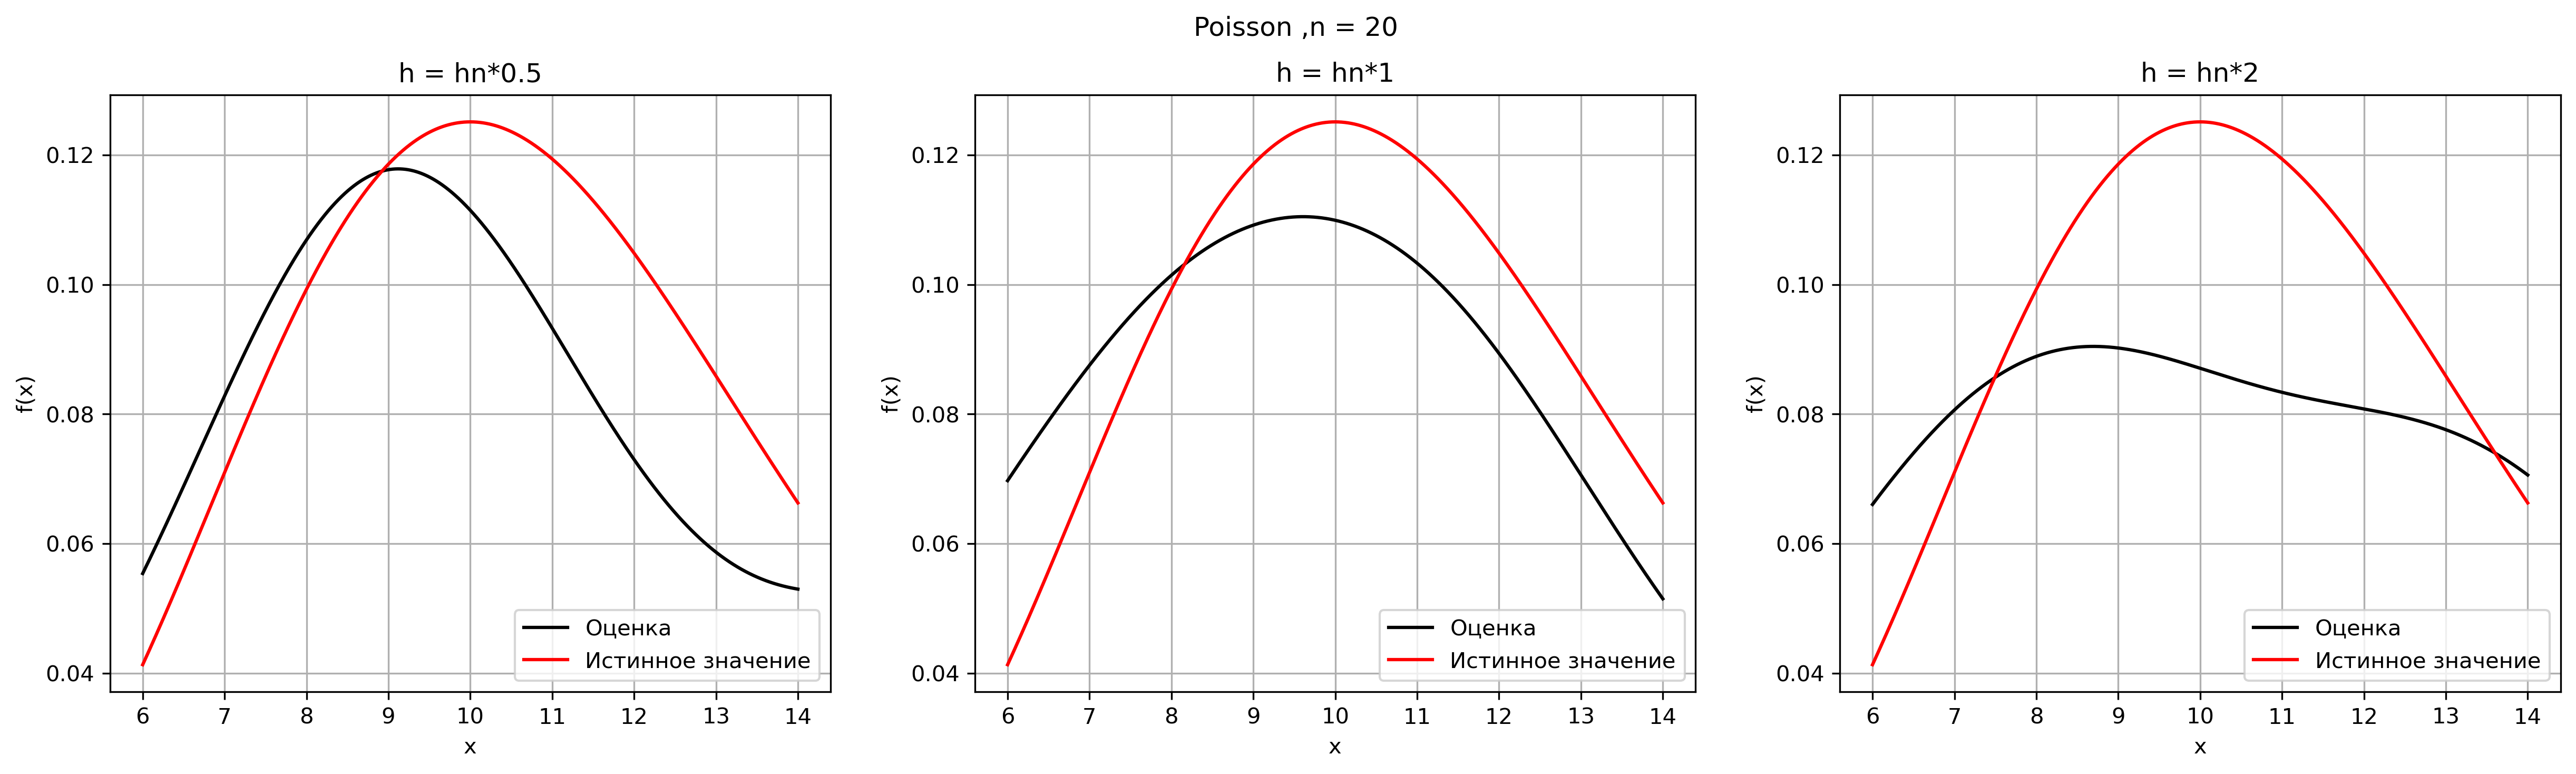

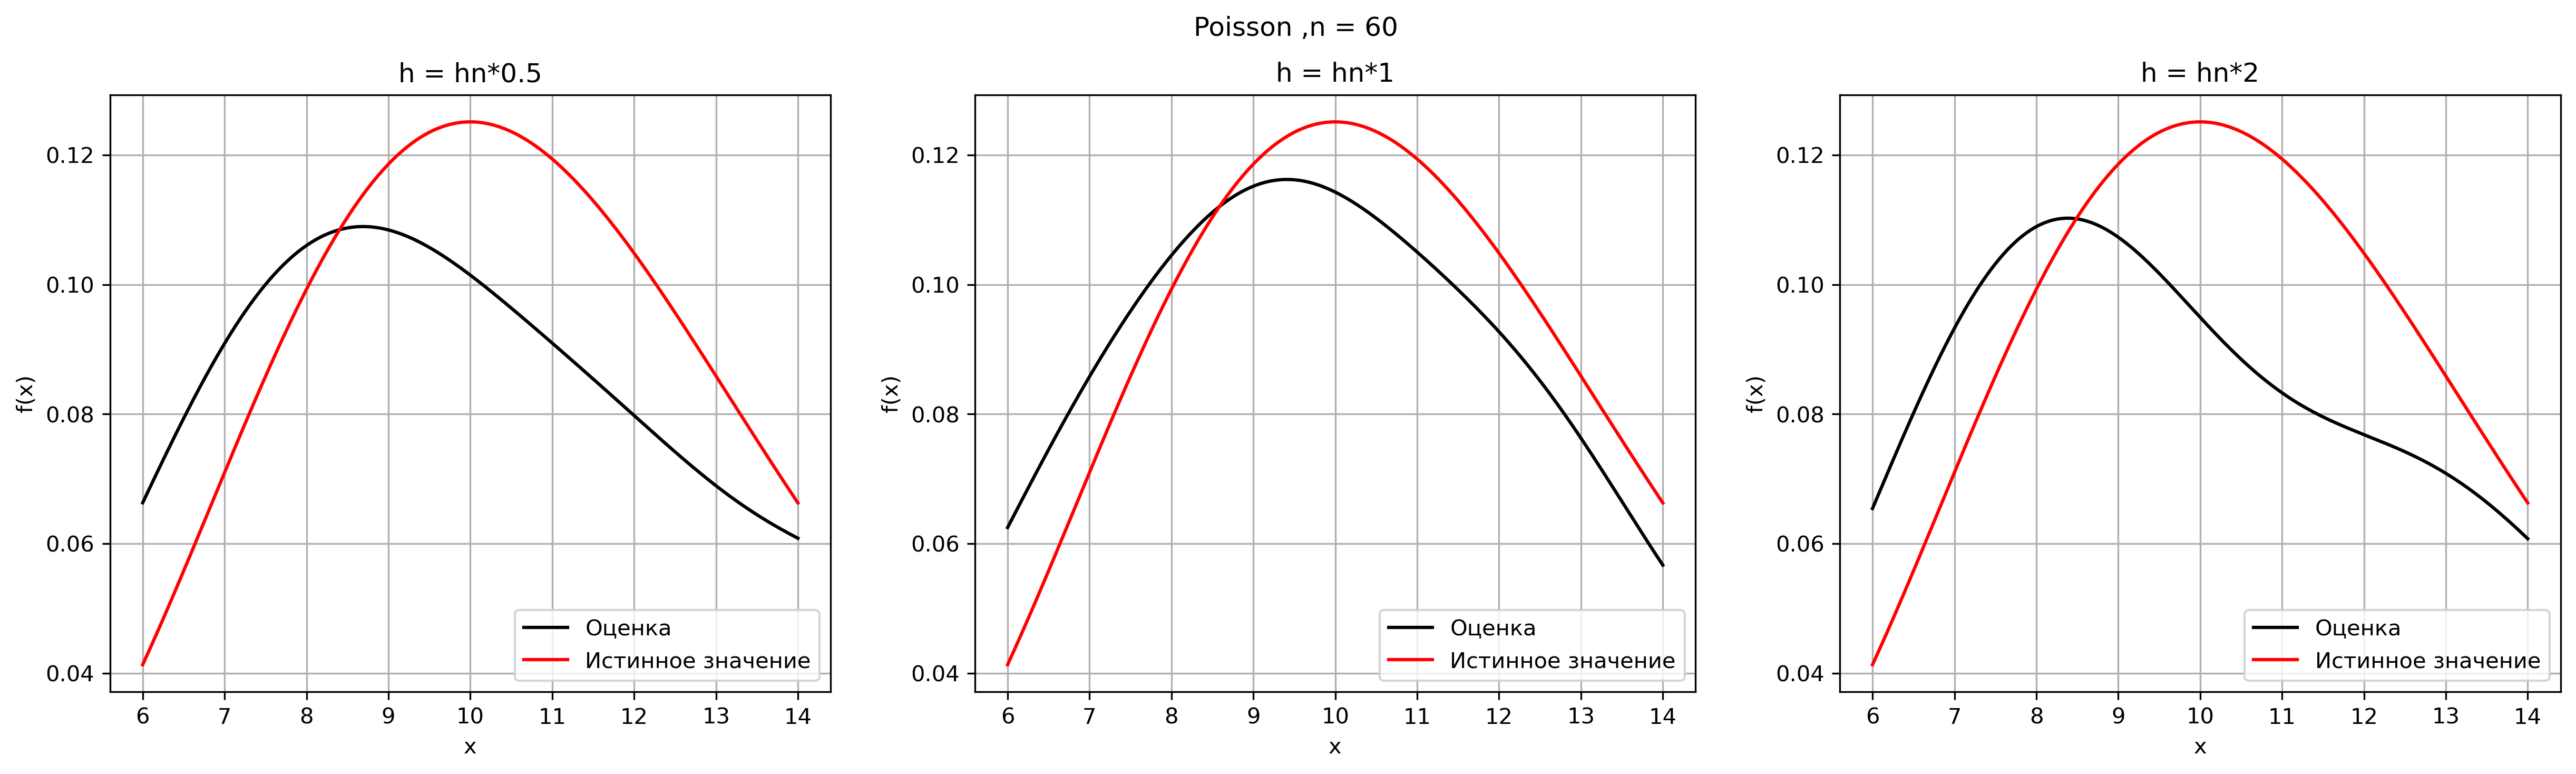

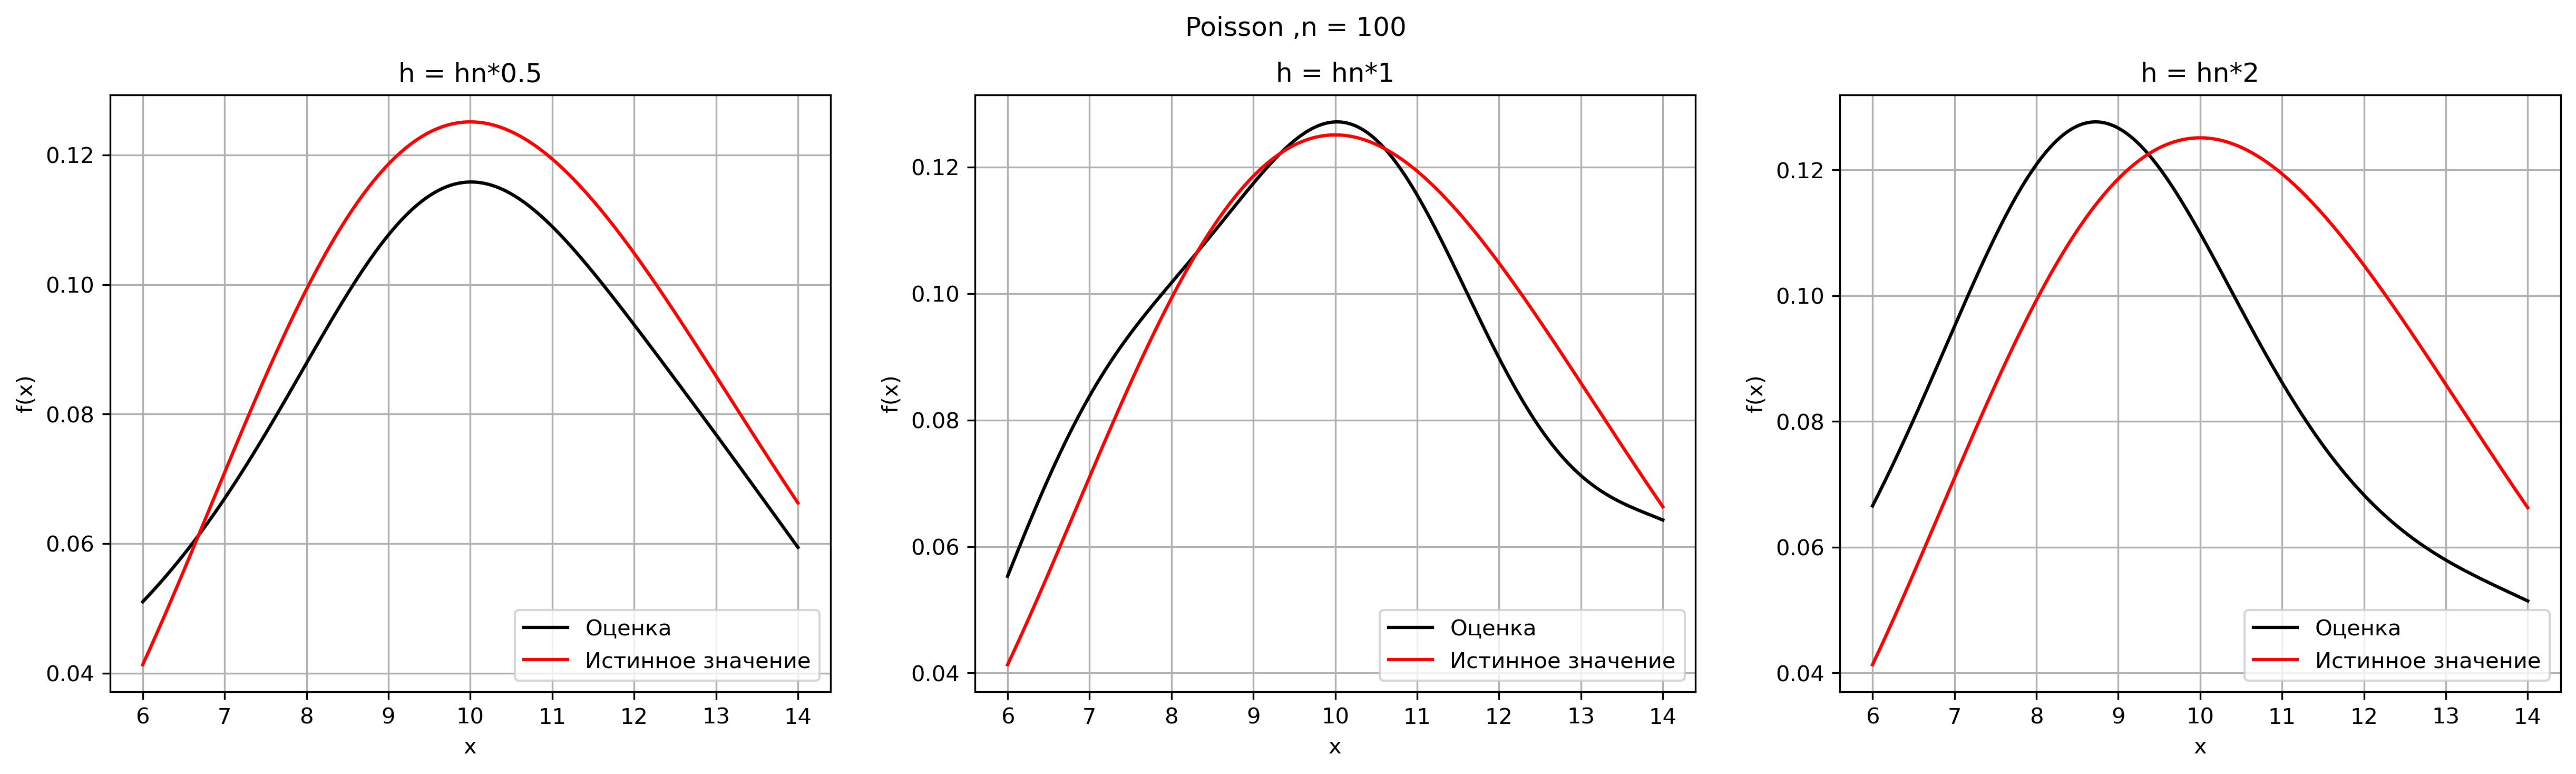

In [15]:
# Распределение Пуассона
size = [20,60,100]
for i in size:
    PlotEstimator(st.poisson,size=i,title="Poisson",mu=10,xlim = [6,14])

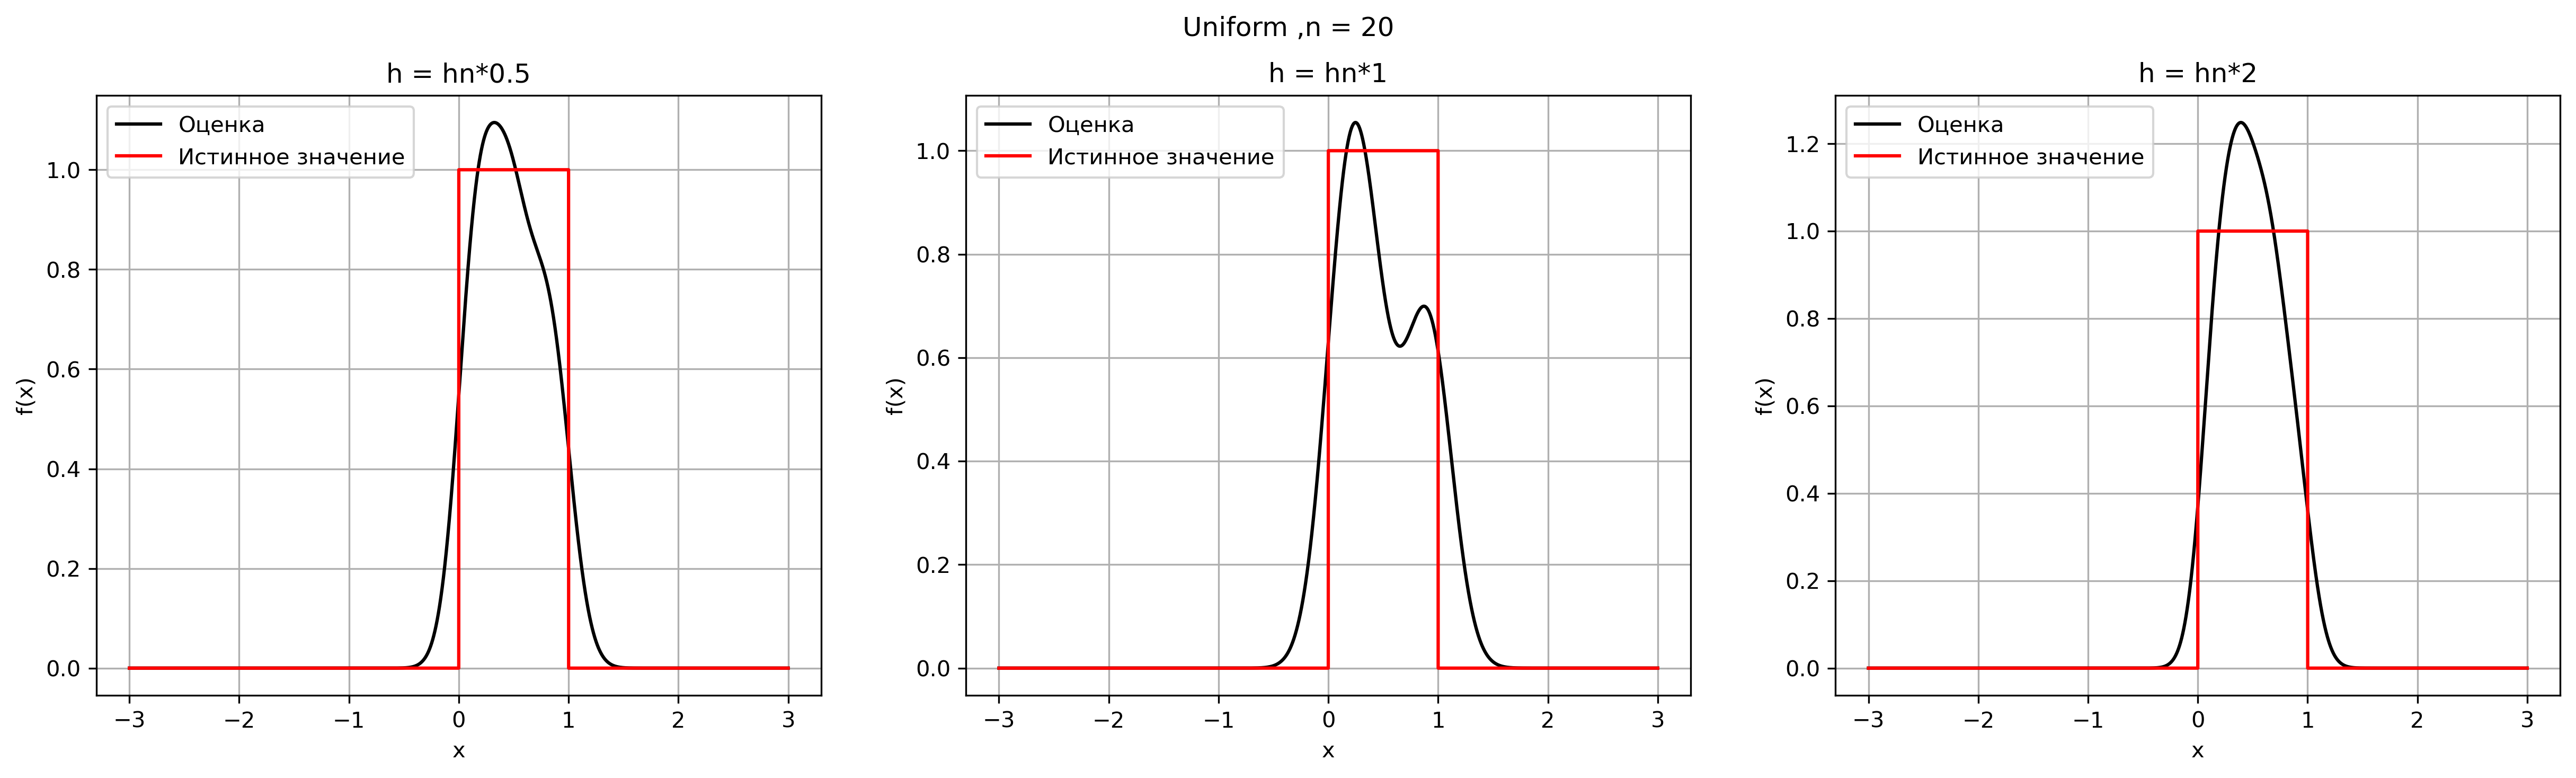

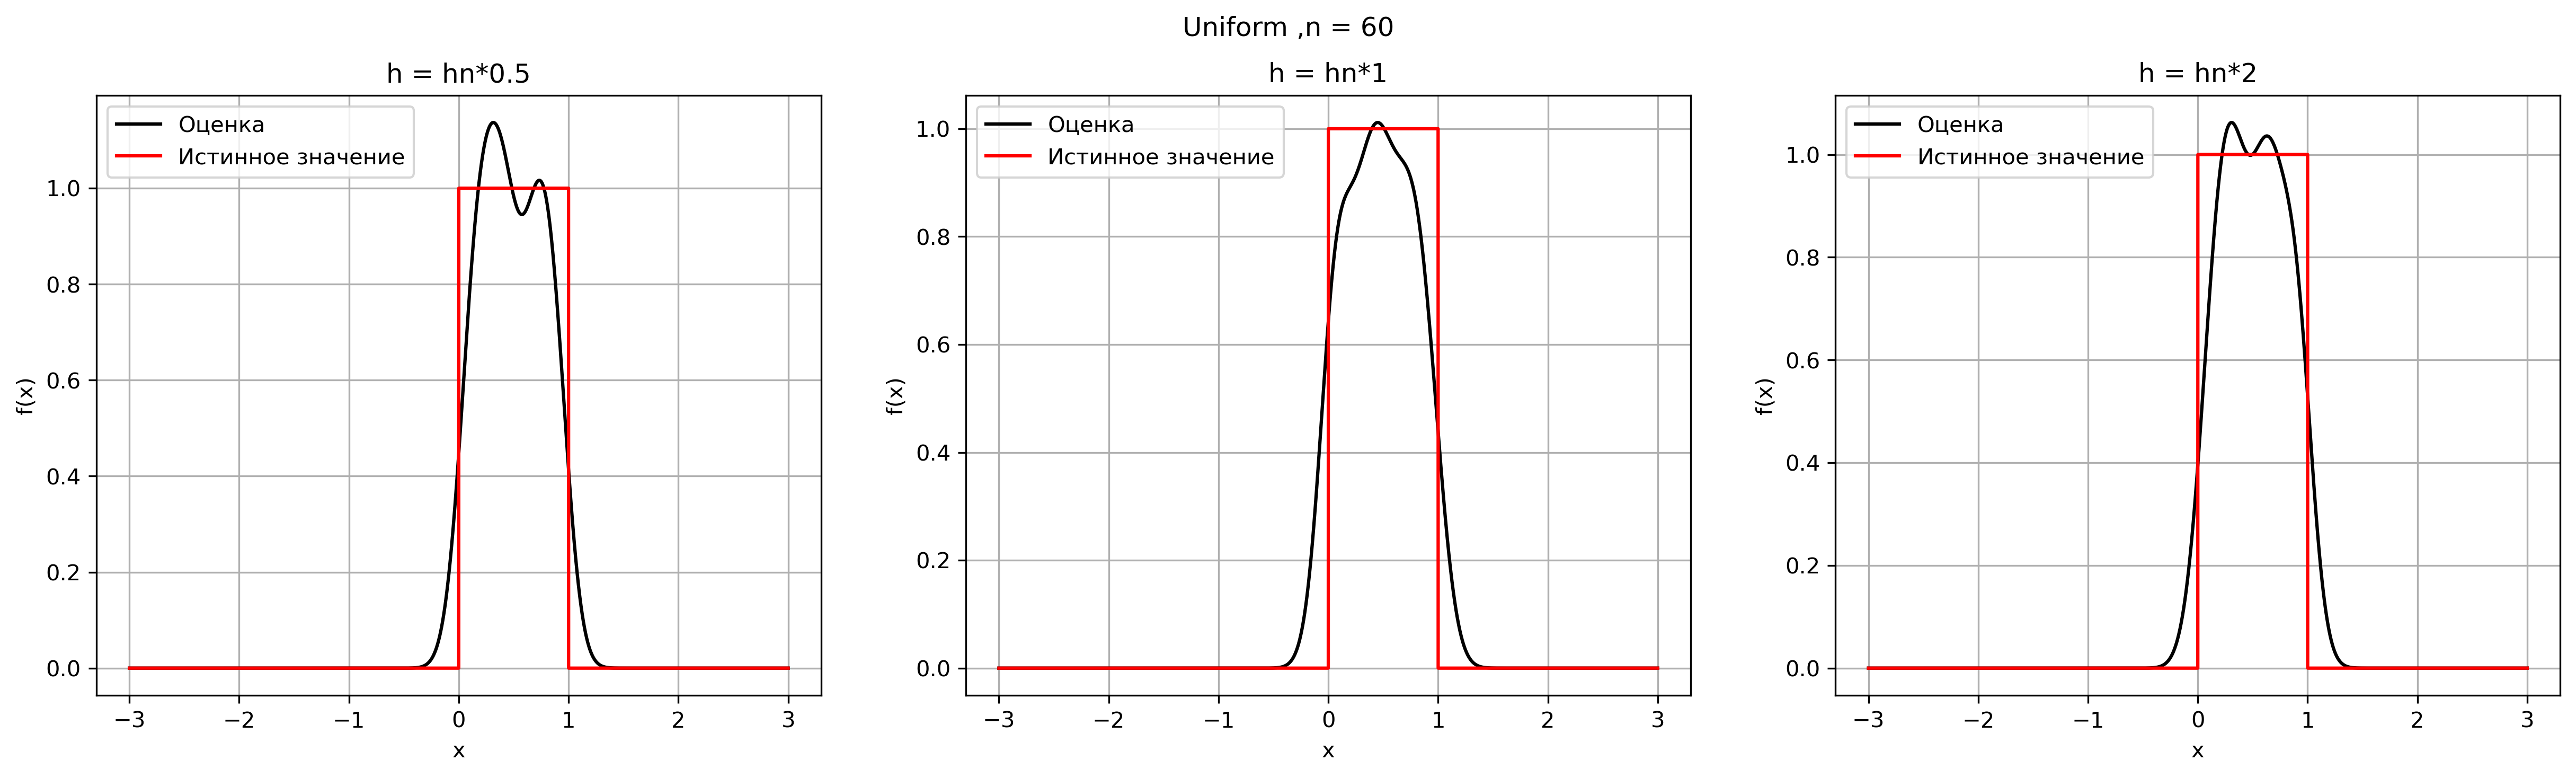

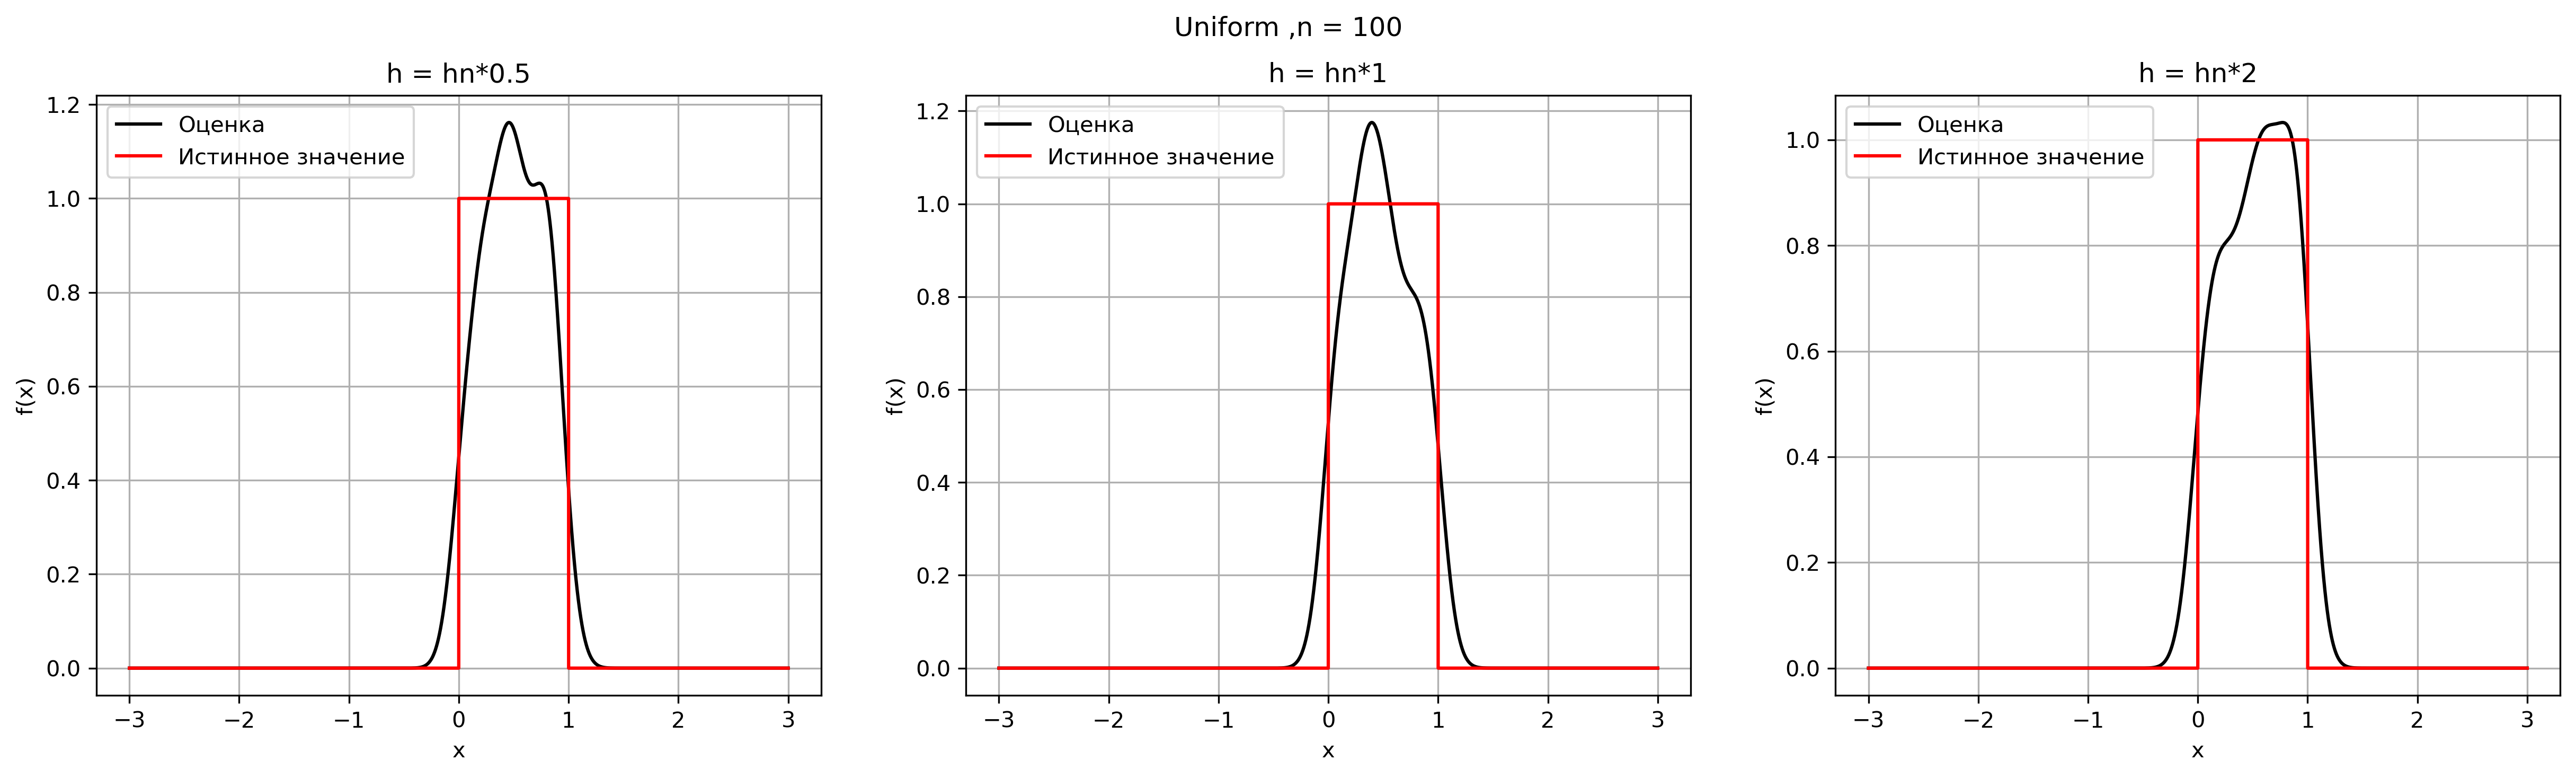

In [16]:
# Равномерное распределение
size = [20,60,100]
for i in size:
    PlotEstimator(st.uniform,size=i,title="Uniform",mu=10,xlim = [-3,3])